#**1 . BUSINESS PROBLEM:**

**OVERVIEW :**

Airbnb, Inc. (Airbnb: AirBedandBreakfast) is an American company that operates an online marketplace for lodging, primarily providing homestays for vacation rentals and tourism activities. Based in San Francisco, a city in California, the platform is accessible via the website and mobile app. Airbnb does not own any listed properties; instead, it profits by receiving a commission from each booking. Let's dive into an interesting Kaggle competition problem that says, 

"Instead of waking to overlooked "Do not disturb" signs, Airbnb travellers find themselves rising with the birds in a whimsical treehouse, having their morning coffee on the deck of a houseboat, or cooking a shared regional breakfast with their hosts.

New users on Airbnb can book a place to stay in 34,000+ cities across 190+ countries. By accurately predicting where a new user will be booking their first travel experience, Airbnb can share more personalized content with their community, decrease the average time to first booking, and better forecast demand.

Through this competition, Airbnb wants to challenge you to predict the country a new user will make one's first booking."


**PROBLEM STATEMENT:**

•	The task at hand is to predict the five most probable destination countries that a new user may choose amongst 12 destination country options: ‘US’, ‘FR’, ‘CA’, ‘GB’, ‘ES’, ‘IT’, ‘PT’, ‘NL’, ’DE’, ‘AU’, ‘NDF’ (no destination found), and ‘other’, given the list of users along with their demographics, web session records, and some summary statistics.

•	To solve the above problem, we use data of users from January – 2010 to June – 2014 for predicting the destination country of the users during July 2014 – September – 2014 (Time based splitting).


**MAPPING THE REAL WORLD PROBLEM TO ML:**

* It is a multi-class classification problem.
* Low latency is required.
* The probability of a data point belonging to each class is needed.
* The interpretability of the model is not so essential.
* Misclassification errors is not of a major concern.

**METRIC FOR EVALUATION:**

The evaluation metric for this competition is NDCG (Normalized discounted cumulative gain). 

#**2. DATASET OVERVIEW:**

The given dataset comprises of 5 files namely **train_users.csv ,test_users.csv, sessions.csv,  countries.csv, age_gender_bkts.csv**

**LOADING DATA**

In [ ]:
#Downloading the Dataset zip file using CurlWget.
!wget --header="Host: storage.googleapis.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/103.0.0.0 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9" --header="Referer: https://www.kaggle.com/" "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/4651/35131/bundle/archive.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1658211526&Signature=6SZi57Nu6qbRNRe5RRuTFI5F4Q5xp5HADDOwEtygO%2BrCJtLYFquK3ekWfyH%2Bs7PxeZwpeBcInZpRKWK1kKw0uRMxOqbfTkch4JJkDwdey2TGvZrEL4WweXRogp8j1lD4joXqtqoZZzepi4ggYkyssciJ8gCtRhmSR9aJmGN%2B8tbmhxEVtQaUsxE7ZEVtHGi%2BXGKxolcmyWazlu4APMd8V3OYDq8s4Jt6bXB9GKesFrFCw5IZdV4p6JZqrd4n6x5mbvlm%2F%2FAAFOR%2FvawUs%2FHGeykeNkbdB9rs%2BZaYAtkECEAm50%2F64oxKpq6Y9bkvB4QZH65OicmCzSY4DDrLy9F8tg%3D%3D&response-content-disposition=attachment%3B+filename%3Dairbnb-recruiting-new-user-bookings.zip" -c -O 'airbnb-recruiting-new-user-bookings.zip'

In [ ]:
#Unzipping the files into MyDrive and storing them in a folder by name DataSets.
!unzip '/content/airbnb-recruiting-new-user-bookings.zip' -d'/content/drive/MyDrive/DataSets'

In [ ]:
#Importing necessary Python Libraries.
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statistics as st
import folium



##**Basic Information on features in Train_data Set and Test Data Set**
**train_users.csv and test_users.csv** holds the information about the training set of users and the test set of users respectively. The following particulars of each user are stored in these files.
  * **id:** user id
  * **date_account_created:** the date of account creation
  * **timestamp_first_active:** timestamp of the first activity, note that it can be earlier than date_account_created or date_first_booking because a user can search before signing up
  * **date_first_booking:** date of first booking
  * **gender of user**
  * **age of user**
  * **signup_method**
  * **signup_flow:** the page a user came to signup up from
  * **language:** international language preference
  * **affiliate_channel:** what kind of paid marketing
  * **affiliate_provider:** where the marketing is e.g. google, craigslist, other
  * **first_affiliate_tracked:** whats the first marketing the user interacted with before the signing up
  * **signup_app**
  * **first_device_type**
  * **first_browser**
  * **country_destination:** this is the target variable you are to predict




###**Train DataSet**

In [ ]:
train_set = pd.read_csv('/content/drive/MyDrive/DataSets/train_users_2.csv.zip')
train_set.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,2010-08-02,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,2012-09-08,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,2010-02-18,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [ ]:
print('No. of users in train_users is: ',train_set.shape[0])

No. of users in train_users is:  213451


In [ ]:
print('The number of features in train_users : ',train_set.shape[1])
print('Features :',train_set.columns)

The number of features in train_users :  16
Features : Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [ ]:
train_set.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

###**Test DataSet**

In [ ]:
test_set = pd.read_csv('/content/drive/MyDrive/DataSets/test_users.csv.zip')
test_set.head(5)

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser
0,5uwns89zht,2014-07-01,20140701000006,NaN,FEMALE,35.0,facebook,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
1,jtl0dijy2j,2014-07-01,20140701000051,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Moweb,iPhone,Mobile Safari
2,xx0ulgorjt,2014-07-01,20140701000148,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,Chrome
3,6c6puo6ix0,2014-07-01,20140701000215,NaN,-unknown-,NaN,basic,0,en,direct,direct,linked,Web,Windows Desktop,IE
4,czqhjk3yfe,2014-07-01,20140701000305,NaN,-unknown-,NaN,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Safari


In [ ]:
print('No. of users in test_users is: ',test_set.shape[0])

No. of users in test_users is:  62096


In [ ]:
print('The number of features in test_users : ',test_set.shape[1])
print('Features :',test_set.columns)

The number of features in test_users :  15
Features : Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser'],
      dtype='object')


##**Basic Information on features in Sessions Dataset:**

The file **sessions.csv** holds the details regarding the web sessions log for users. It consists of following particulars.
  * **user_id:** to be joined with the column 'id' in users table
  * **action**
  * **action_type**
  * **action_detail**
  * **device_type**
  * **secs_elapsed**

In [ ]:
sessions = pd.read_csv('/content/drive/MyDrive/DataSets/sessions.csv.zip')
sessions.head(5)

,user_id,action,action_type,action_detail,device_type,secs_elapsed
0,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,319.0
1,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,67753.0
2,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,301.0
3,d1mm9tcy42,search_results,click,view_search_results,Windows Desktop,22141.0
4,d1mm9tcy42,lookup,NaN,NaN,Windows Desktop,435.0


In [ ]:
print('Features :',sessions.columns)

Features : Index(['user_id', 'action', 'action_type', 'action_detail', 'device_type',
       'secs_elapsed'],
      dtype='object')


In [ ]:
print('Shape of sessions Dataset :',sessions.shape)

Shape of sessions Dataset : (10567737, 6)


##**Basic Information on features in Countries Set**

The file **countries.csv** consists of summary statistics of **destination countries in this dataset and their locations**.


In [ ]:
countries = pd.read_csv('/content/drive/MyDrive/DataSets/countries.csv.zip')
countries

,country_destination,lat_destination,lng_destination,distance_km,destination_km2,destination_language,language_levenshtein_distance
0,AU,-26.853388,133.275160,15297.7440,7741220.0,eng,0.00
1,CA,62.393303,-96.818146,2828.1333,9984670.0,eng,0.00
2,DE,51.165707,10.452764,7879.5680,357022.0,deu,72.61
3,ES,39.896027,-2.487694,7730.7240,505370.0,spa,92.25
4,FR,46.232193,2.209667,7682.9450,643801.0,fra,92.06
5,GB,54.633220,-3.432277,6883.6590,243610.0,eng,0.00
6,IT,41.873990,12.564167,8636.6310,301340.0,ita,89.40
7,NL,52.133057,5.295250,7524.3203,41543.0,nld,63.22
8,PT,39.553444,-7.839319,7355.2534,92090.0,por,95.45
9,US,36.966427,-95.844030,0.0000,9826675.0,eng,0.00


In [ ]:
print('Features in Countries.csv :',countries.columns)

Features in Countries.csv : Index(['country_destination', 'lat_destination', 'lng_destination',
       'distance_km', 'destination_km2', 'destination_language ',
       'language_levenshtein_distance'],
      dtype='object')


In [ ]:
#Reference : https://towardsdatascience.com/creating-a-simple-map-with-folium-and-python-4c083abfff94
#Reference : https://www.appliedaicourse.com/lecture/11/applied-machine-learning-online-course/3196/data-cleaning-latitude-and-longitude-data/7/module-6-machine-learning-real-world-case-studies
locations = countries[['lat_destination','lng_destination','country_destination']]
map = folium.Map(location=[locations.lat_destination.mean(), locations.lng_destination.mean()], zoom_start=15, control_scale=True)
for index, location_info in locations.iterrows():
    folium.Marker([location_info["lat_destination"], location_info["lng_destination"]], popup=location_info["country_destination"]).add_to(map)

map

##**Basic Information on features in Age Gender brackets dataset**

The file **age_gender_bkts.csv** consists of summary statistics of **users' age group, gender, country of destination**.

In [ ]:
age_buckets = pd.read_csv('/content/drive/MyDrive/DataSets/age_gender_bkts.csv.zip')
age_buckets

,age_bucket,country_destination,gender,population_in_thousands,year
0,100+,AU,male,1.0,2015.0
1,95-99,AU,male,9.0,2015.0
2,90-94,AU,male,47.0,2015.0
3,85-89,AU,male,118.0,2015.0
4,80-84,AU,male,199.0,2015.0
...,...,...,...,...,...
415,95-99,US,male,115.0,2015.0
416,90-94,US,male,541.0,2015.0
417,15-19,US,female,10570.0,2015.0
418,85-89,US,male,1441.0,2015.0


In [ ]:
age_buckets.age_bucket.unique()

array(['100+', '95-99', '90-94', '85-89', '80-84', '75-79', '70-74',
       '65-69', '60-64', '55-59', '50-54', '45-49', '40-44', '35-39',
       '30-34', '25-29', '20-24', '15-19', '10-14', '5-9', '0-4'],
      dtype=object)

#**3. DATA CLEANING:**

##**CLEANING SESSIONS DATASET TO COMPATABILY MERGE WITH TRAIN AND TEST USER DATASETS:**

In [ ]:
print('Null values in Sessions Dataset :')
sessions.isnull().sum()

Null values in Sessions Dataset :


user_id            34496
action             79626
action_type      1126204
action_detail    1126204
device_type            0
secs_elapsed      136031
dtype: int64

**Observation :**

There are 34496 entries where in the user_id are not known. Hence, these rows will be removed.

In [ ]:
#Removing the rows with no user_id
sessions = sessions.dropna(subset=['user_id'])
print('Shape of the sessions dataset after removing rows with no user_id: ',sessions.shape)

Shape of the sessions dataset after removing rows with no user_id:  (10533241, 6)


**ANALYSING THE PERCENTAGE OF USERS IN TRAIN USER AND TEST USER DATASETS WHO HAVE THEIR WEB SESSION LOGS RECORDED :** 

In [ ]:
print('No. of Unique users in Sessions Dataset: ', len(sessions['user_id'].unique()))
print('No. of Unique users in Train Dataset: ',len(train_set['id'].unique()))
print('No. of Unique users in Test Dataset: ',len(test_set['id'].unique()))

No. of Unique users in Sessions Dataset:  135483
No. of Unique users in Train Dataset:  213451
No. of Unique users in Test Dataset:  62096


In [ ]:
print('No. of users in train Dataset with no session details are:',len(set(train_set['id'])-set(sessions['user_id'].unique())))
print('Percentage of users in train Dataset with no session details are:',\
      np.round(len(set(train_set['id'])-set(sessions['user_id'].unique()))/len(train_set['id'].unique())*100,3),'%')

No. of users in train Dataset with no session details are: 139636
Percentage of users in train Dataset with no session details are: 65.418 %


In [ ]:
print('No. of users in test Dataset with no session details are:',len(set(test_set['id'])-set(sessions['user_id'].unique())))
print('Percentage of users in test Dataset with no session details are:',\
      np.round(len(set(test_set['id'])-set(sessions['user_id'].unique()))/len(test_set['id'].unique())*100,3),'%')

No. of users in test Dataset with no session details are: 428
Percentage of users in test Dataset with no session details are: 0.689 %


**Observation :**

The sessions activity of about 65.418% of user's belonging to train dataset are not recorded while 0.689% of user's belonging to test dataset are not recorded.

**DEALING WITH THE NULL VALUES IN SECS_ELAPSED, ACTION, ACTION_TYPE AND ACTION_DETAIL FEATURES :**

In [ ]:
#Replacing nan secs_elapsed with zero
sessions['secs_elapsed'].fillna(0,inplace = True)

In [ ]:
#Finding the unique subcategories in action_type feature for the rows with action values as Null values
sessions[sessions['action'].isnull()]['action_type'].unique()

array(['message_post'], dtype=object)

In [ ]:
#Finding the unique subcategories in action_detail feature for the rows with action values as Null values
sessions[sessions['action'].isnull()]['action_detail'].unique()

array(['message_post'], dtype=object)

In [ ]:
sessions['action'][sessions['action_type']=='message_post'].unique()

array([nan, '15', '12', '10', '11', 'multi_message',
       'guest_booked_elsewhere', 'preapproval', 'maybe_information',
       'special_offer'], dtype=object)

In [ ]:
sessions['action'][sessions['action_detail']=='message_post'].unique()

array([nan, '15', '12', '10', '11', 'multi_message',
       'guest_booked_elsewhere', 'preapproval', 'maybe_information',
       'special_offer'], dtype=object)

**Observation :**

Observations with action_type and action_details as **'message_post'** have no action in correspondence. 

**Course of Action:**

Replacing the nan values in action with new category called **'other_message'**

In [ ]:
#Replacing the nan values in action with new category called 'message_post'
sessions['action'].fillna('other_message',inplace = True)

In [ ]:
sessions['action'][sessions.action_type=='message_post'].unique()

array(['other_message', '15', '12', '10', '11', 'multi_message',
       'guest_booked_elsewhere', 'preapproval', 'maybe_information',
       'special_offer'], dtype=object)

In [ ]:
sessions.isnull().sum()

user_id                0
action                 0
action_type      1122957
action_detail    1122957
device_type            0
secs_elapsed           0
dtype: int64

Replacing all the null values of action_type and action_detail with a new categories called 'no_type' and 'no_detail' respectively.

In [ ]:
#Replacing all the null values of action_type and action_detail with a new categories called 'no_type' and 'no_detail' respectively.
sessions['action_type'].fillna('no_type',inplace = True)
sessions['action_detail'].fillna('no_detail',inplace = True)

In [ ]:
sessions.isnull().sum()

user_id          0
action           0
action_type      0
action_detail    0
device_type      0
secs_elapsed     0
dtype: int64

**COMBINING ACTION, ACTION_TYPE AND ACTION_DETAIL AS A SINGLE FEATURE 'ACTIVITY'**

In [ ]:
def combine_features(f1,f2,f3):
  """
  Function that takes 3 string and joins them by '_'(Underscore) 
  
  """
  return str(f1)+'_'+str(f2)+'_'+str(f3)

In [ ]:
#Applying a User-defined that joins 'action','action_detail' and 'action_type' into a single string by '_' and dropping the columns

sessions['activity'] = sessions.apply(lambda x: combine_features(x['action'],x['action_detail'],x['action_type']), axis=1)
sessions.drop(['action','action_type','action_detail'],axis=1,inplace=True)


In [ ]:
#Dropping the device_type column:
sessions.drop(['device_type'],axis=1,inplace=True)

In [ ]:
sessions.head(5)

,user_id,secs_elapsed,activity
0,d1mm9tcy42,319.0,lookup_no_detail_no_type
1,d1mm9tcy42,67753.0,search_results_view_search_results_click
2,d1mm9tcy42,301.0,lookup_no_detail_no_type
3,d1mm9tcy42,22141.0,search_results_view_search_results_click
4,d1mm9tcy42,435.0,lookup_no_detail_no_type


In [ ]:
#Grouping the sessions dataset by user_id:
sessions_dataset = sessions.groupby("user_id", as_index= False,sort=False).agg(lambda x:x.tolist())

In [ ]:
sessions_dataset.head(5)

,user_id,secs_elapsed,activity
0,d1mm9tcy42,"[319.0, 67753.0, 301.0, 22141.0, 435.0, 7703.0...","[lookup_no_detail_no_type, search_results_view..."
1,yo8nz8bqcq,"[2739.0, 0.0, 115983.0, 20285.0, 3255.0, 47308...","[dashboard_dashboard_view, create_create_user_..."
2,4grx6yxeby,"[65080.0, 0.0, 59801.0, 1000.0, 1624.0, 5134.0...","[verify_-unknown-_-unknown-, create_create_use..."
3,ncf87guaf0,"[2204.0, 10834.0, 575.0, 578.0, 12407.0, 829.0...","[lookup_no_detail_no_type, show_p3_view, searc..."
4,4rvqpxoh3h,"[375.0, 728.0, 0.0, 187.0, 154.0, 204.0, 21.0,...","[campaigns_-unknown-_-unknown-, active_-unknow..."


In [ ]:
sessions_dataset.shape

(135483, 3)

**LOADING SESSIONS_DATASET INTO CSV_FILE:**

In [ ]:
sessions_dataset.to_csv('/content/drive/MyDrive/DataSets/sessions_cleaned.csv',index=False)

##**DEALING WITH NULL VALUES IN TRAIN USER DATASET :**

In [ ]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       213451 non-null  object 
 1   date_account_created     213451 non-null  object 
 2   timestamp_first_active   213451 non-null  int64  
 3   date_first_booking       88908 non-null   object 
 4   gender                   213451 non-null  object 
 5   age                      125461 non-null  float64
 6   signup_method            213451 non-null  object 
 7   signup_flow              213451 non-null  int64  
 8   language                 213451 non-null  object 
 9   affiliate_channel        213451 non-null  object 
 10  affiliate_provider       213451 non-null  object 
 11  first_affiliate_tracked  207386 non-null  object 
 12  signup_app               213451 non-null  object 
 13  first_device_type        213451 non-null  object 
 14  firs

In [ ]:
#Creating a DataFrame with features, number of null values and percentage of null values as columns.
null_values = pd.DataFrame(list(zip(list(train_set.columns),list(train_set.isnull().sum()))),columns = ['Features','No of Null Values'])
null_values['% of Null Values'] = null_values['No of Null Values']/len(train_set)*100
null_values

,Features,No of Null Values,% of Null Values
0,id,0,0.000000
1,date_account_created,0,0.000000
2,timestamp_first_active,0,0.000000
3,date_first_booking,124543,58.347349
4,gender,0,0.000000
5,age,87990,41.222576
6,signup_method,0,0.000000
7,signup_flow,0,0.000000
8,language,0,0.000000
9,affiliate_channel,0,0.000000


In [ ]:
train_set.country_destination.value_counts()

NDF      124543
US        62376
other     10094
FR         5023
IT         2835
GB         2324
ES         2249
CA         1428
DE         1061
NL          762
AU          539
PT          217
Name: country_destination, dtype: int64

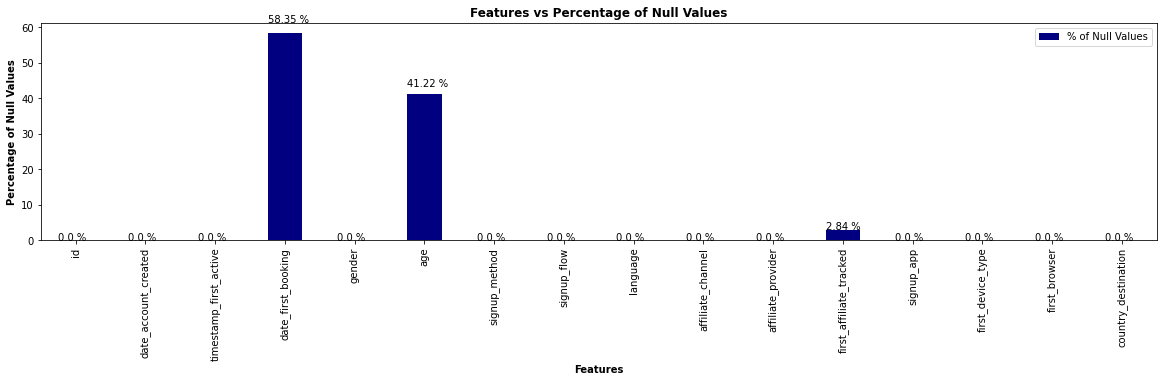

In [ ]:
#Bar plot that shows the percentage of Null values in each feature:
#Reference : https://www.shanelynn.ie/bar-plots-in-python-using-pandas-dataframes/
#Reference : https://www.geeksforgeeks.org/how-to-save-a-plot-to-a-file-using-matplotlib/

import imageio
plt.rcParams['figure.figsize'] = (20,4)
ax = null_values.plot.bar(x='Features', y='% of Null Values', rot=90,color ='#000080')
for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),2))+' %', (p.get_x(), p.get_height() * (1.05)),rotation=0,color='black')
plt.title('Features vs Percentage of Null Values',fontweight="bold")
plt.xlabel('Features',fontweight="bold")
plt.ylabel('Percentage of Null Values',fontweight="bold")

plt.savefig("Features vs Percentage of Null Values.jpg")
#plt.imsave('img_new.jpg',image )
 

plt.show()

**Observations :**

* From the null values dataframe and country_destination value_counts details, we observe that the number of missing values in date_first_booking are same as number of users whose country_destination is under NDF status. 

**Course of action:**

* Drop the date_first_booking feature as there can be Data leak problem while retaining all the other features. 

**Removing the date_first_booking feature:**

In [ ]:
#Removing the date_first_booking
train_set.drop(['date_first_booking'],axis=1,inplace=True)

####**Imputing NaN values in feature - AGE**

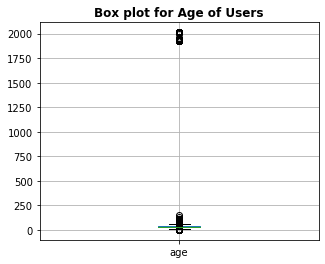

In [ ]:
# Plotting Box plot to analyze the anamolities in Age Attribute:
# Reference : 
plt.rcParams['figure.figsize'] = (5,4)

#Plotting Box plot to analyze the anamolities in Age Attribute:
train_set.boxplot('age')
plt.title('Box plot for Age of Users',fontweight="bold")
plt.show()

**Observation from Box Plot:**

* From the Box plot, we find that there are many datapoints around 0 to 100 years. The width of the box plot is so small which implies that we can find many values very close to the median of the age or we can say that the points are closely packed (ie., has less variability).

* We observe that there are few points around 1900 to 2014. This implies that there are outliers in the age feature which are to be addressed. 

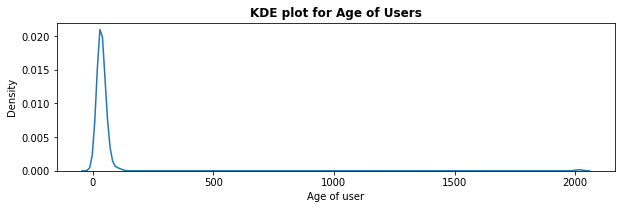

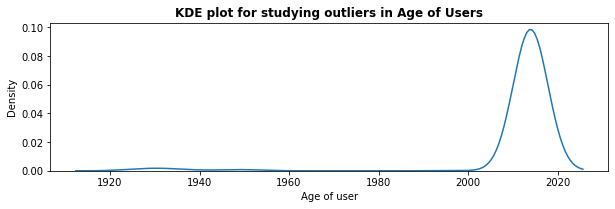

In [ ]:
plt.rcParams['figure.figsize'] = (10,6)

#Plotting Overall KDE plot to analyze the anamolities in Age Attribute:
plt.subplot(2,1,1)
sns.kdeplot(train_set['age'])
plt.title('KDE plot for Age of Users',fontweight="bold")
plt.xlabel('Age of user')
plt.ylabel('Density')
plt.show()

#Plotting KDE plot to analyze the anamolities in between 1900 and 2015 Age values:
plt.subplot(2,1,2)
sns.kdeplot(train_set['age'][(train_set['age']>1900) & (train_set['age']<2015)])
plt.title('KDE plot for studying outliers in Age of Users',fontweight="bold")
plt.xlabel('Age of user')
plt.ylabel('Density')
plt.show()

**Observation from KDE plot :**

* From KDE plot for age of users, we find there are more points around 0 to 100. 

* We do find few points from 1900 to 2014. There are more around 2012 to 2014. These observations can be considered as human errors where in the user instead of entering his/her age, might have entered the birth year as their age or current year (2014) as age.


In [ ]:
#Splitting the train_session dataset based on null values in 'age' column and retaining only 'age' column:
#Reference : https://stackoverflow.com/questions/54977459/pandas-splitting-a-dataframe-based-on-null-values-in-a-column
age_notnull= train_set['age'][train_set['age'].notnull()]

In [ ]:
#Creating a DataFrame that summarizes the descriptive statistics of the age of users in train_session dataset:

age = pd.DataFrame({'Minimum':age_notnull.min(),'Median': age_notnull.median(),'1st percentile':np.percentile(age_notnull,1),\
                    '10th percentile':np.percentile(age_notnull,10),'15th percentile':np.percentile(age_notnull,15),\
                    '25th percentile':np.percentile(age_notnull,25),'75th percentile':np.percentile(age_notnull,75),\
                    '90th percentile':np.percentile(age_notnull,90),'95th percentile':np.percentile(age_notnull,95),\
                    '99th percentile':np.percentile(age_notnull,99),'Maximum':age_notnull.max(),\
                    'Mean':age_notnull.mean(), 'Mode' : st.mode(age_notnull)},index = ['Age of the User'])
age

,Minimum,Median,1st percentile,10th percentile,15th percentile,25th percentile,75th percentile,90th percentile,95th percentile,99th percentile,Maximum,Mean,Mode
Age of the User,1.0,34.0,19.0,25.0,26.0,28.0,43.0,56.0,64.0,105.0,2014.0,49.668335,30.0


**Observation From the above DataFrame:**

* The **median** of the age of users is **34 years**. 

* There are only **1 percentile of users** with age **less than 19 years** and only **1 percentile of users** with age **greater than 105**.

* Mode (**30**) < Median (**34**) < Mean (**49.6**) - This implies that the age is **skewed towards right** or **Positively skewed**.

* The **Inter-Quartile range (IQR)** = (75th percentile - 25th percentile) = 43 - 28 = **15 years**. The central spread of age feature is **15 years.**

**Course of Action :**

1) Fill all the NaN values with the median of user's age.

2) If the user's age is between 1900 years and 2014 years, it would be replaced by (2014 - user's age).

3) If the user's age is not in between 19 years and 105 years, it would be replaced by median of user's age (ie., 34 years).



In [ ]:
train_set['age'].describe()

count    125461.000000
mean         49.668335
std         155.666612
min           1.000000
25%          28.000000
50%          34.000000
75%          43.000000
max        2014.000000
Name: age, dtype: float64

In [ ]:
train_set['age'].fillna(train_set['age'].median(),inplace = True)
train_set.loc[train_set[(train_set['age']>1900)&(train_set['age']<2015)].index,'age'] = 2014 - train_set['age']
train_set.loc[train_set[(train_set['age']<19) | (train_set['age']>105)].index,'age'] = train_set['age'].median()

In [ ]:
train_set['age'].describe()

count    213451.000000
mean         35.957990
std          10.376559
min          19.000000
25%          32.000000
50%          34.000000
75%          35.000000
max         105.000000
Name: age, dtype: float64

####**Imputing NaN values in feature - first_affiliate_tracked**

In [ ]:
#Filling the Null values in 'first_affiliate_tracked' with the mode of the feature. 
train_set['first_affiliate_tracked'].fillna(train_set['first_affiliate_tracked'].mode()[0], inplace = True)

In [ ]:
#Rechecking for Null values in Train_session dataset.
train_set.isnull().sum()

id                         0
date_account_created       0
timestamp_first_active     0
gender                     0
age                        0
signup_method              0
signup_flow                0
language                   0
affiliate_channel          0
affiliate_provider         0
first_affiliate_tracked    0
signup_app                 0
first_device_type          0
first_browser              0
country_destination        0
dtype: int64

#**4. EXPLORATORY DATA ANALYSIS ON TRAIN USERS DATASET:**

In [ ]:
train_set.head(5)

,id,date_account_created,timestamp_first_active,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,2010-06-28,20090319043255,-unknown-,34.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,2011-05-25,20090523174809,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,2010-09-28,20090609231247,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,2011-12-05,20091031060129,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,2010-09-14,20091208061105,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


Firstly, Let's understand the distribution of country destination (Output class labels).

In [ ]:
colors = ['#000080', '#79b47c', '#7f7f7f', '#bcbd22', '#17becf','#ff7f0e', '#2ca02c', '#d62728', '#9467bd','#8c564b'] 

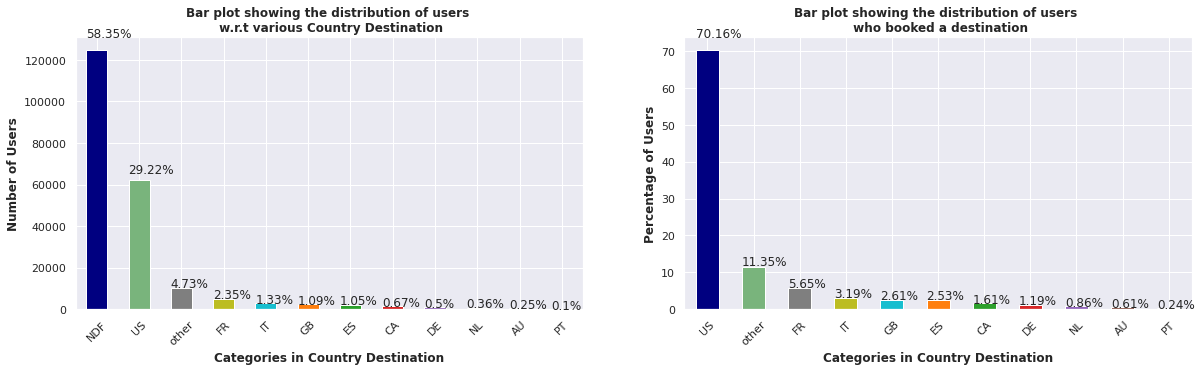

In [ ]:
#Bar plot to show the distribution of users w.r.t their country destination chosen (NDF included):

plt.figure(figsize = (20,5))
sns.set(style="darkgrid")

plt.subplot(1,2,1)
ax_cd = train_set.country_destination.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_cd.patches:
    ax_cd.annotate(str(np.round(p.get_height()*100/train_set.shape[0],2))+'%', (p.get_x(), p.get_height() * 1.05))
plt.title('Bar plot showing the distribution of users \n w.r.t various Country Destination',fontweight='bold')
plt.xlabel('Categories in Country Destination',fontweight='bold')
plt.ylabel('Number of Users',fontweight='bold')


#Calculating the percentage distribution of Users who booked a destination:

Non_NDF = train_set[train_set.country_destination != 'NDF']['country_destination'].value_counts()
Non_NDF = pd.DataFrame(zip(Non_NDF.index,Non_NDF.tolist()),columns=['Destination','Users_no'])
Non_NDF['Percent_users'] = Non_NDF.Users_no.apply(lambda x: (x*100 /Non_NDF.Users_no.sum()))


#Bar plot to show the distribution of users w.r.t their country destination chosen (NDF excluded):

plt.subplot(1,2,2)
ax_non_ndf = Non_NDF.Percent_users.plot(kind='bar', color = colors,rot=45)
for p in ax_non_ndf.patches:
    ax_non_ndf.annotate(str(np.round(p.get_height(),2))+'%', (p.get_x(), p.get_height() * 1.05))
plt.xticks(Non_NDF.index, Non_NDF.Destination, rotation=45)
plt.title('Bar plot showing the distribution of users \n who booked a destination',fontweight='bold')
plt.xlabel('Categories in Country Destination',fontweight='bold')
plt.ylabel('Percentage of Users',fontweight='bold')

plt.show()

**Observation :**

*   **58.35%** of the users didn't choose any destination (ie., NDF) while Only **38.98%** ended up booking a destination spot. The dataset is imbalanced with the majority class as **NDF**.
*   Amongst **41.65%** of users who booked a destination spot, about **70.16%** chose **US** as their destination country.



###**UNIVARIATE ANALYSIS:**

####**DATE OF ACCOUNT CREATED**

In [ ]:
#Converting the Date of account created column into proper date format:
train_set['date_account_created'] = pd.to_datetime(train_set['date_account_created'])

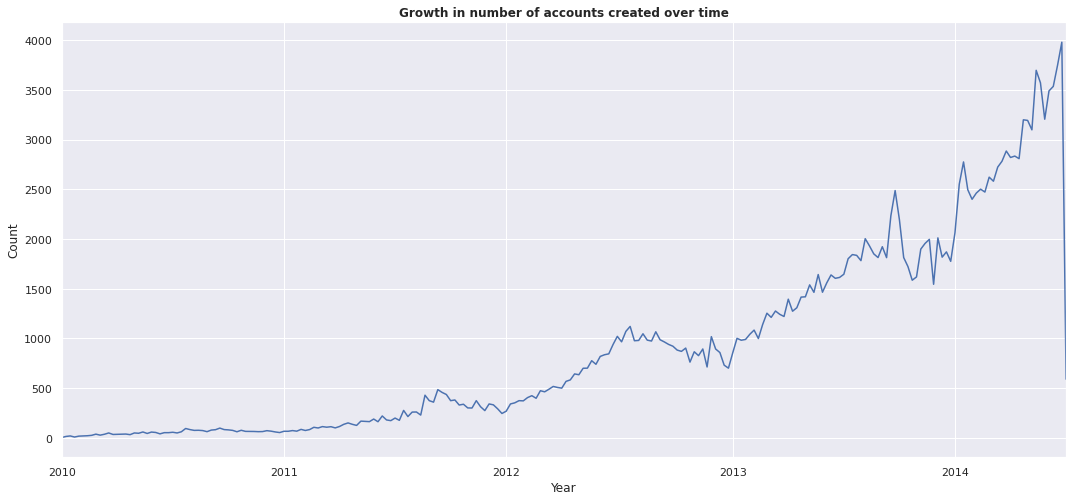

In [ ]:
#Plot that shows growth in number of accounts created over time
#https://www.kaggle.com/code/mohamedelgebaly/airbnb-vf#Session-Dataset-exploration-and-aggregation

plt.figure(figsize=(18,8))
sns.set(style="darkgrid")

train_set['date_account_created'].value_counts().resample('W').sum().plot.line(linewidth=1.5)
plt.title('Growth in number of accounts created over time',fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

**Observations:**

* We observe that in every year, for the first six to seven months, there is a continuous growth and after that there is a small dip in the number of accounts created. 

* Number of accounts created are increasing from one year to another.

* Hence, we can extract month,year,day features to analyze further. 

####**GENDER**

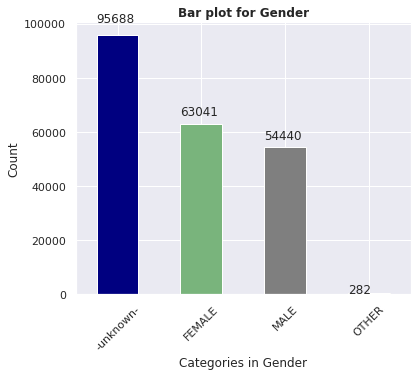

In [ ]:
#Bar plot to show the distribution of users w.r.t their genders:

plt.figure(figsize = (6,5))
ax_gen = train_set.gender.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_gen.patches:
    ax_gen.annotate(str(p.get_height()), (p.get_x(), p.get_height() * 1.05))
plt.title('Bar plot for Gender',fontweight='bold')
plt.xlabel('Categories in Gender')
plt.ylabel('Count')
plt.show()

**Observation :**

* This plot shows the distribution of users with respect to their genders.

* We observe that most of the users (**44.8% of users**)  preferred not to disclose their gender. 

* Between male and female users, we find there are more female users than male users.

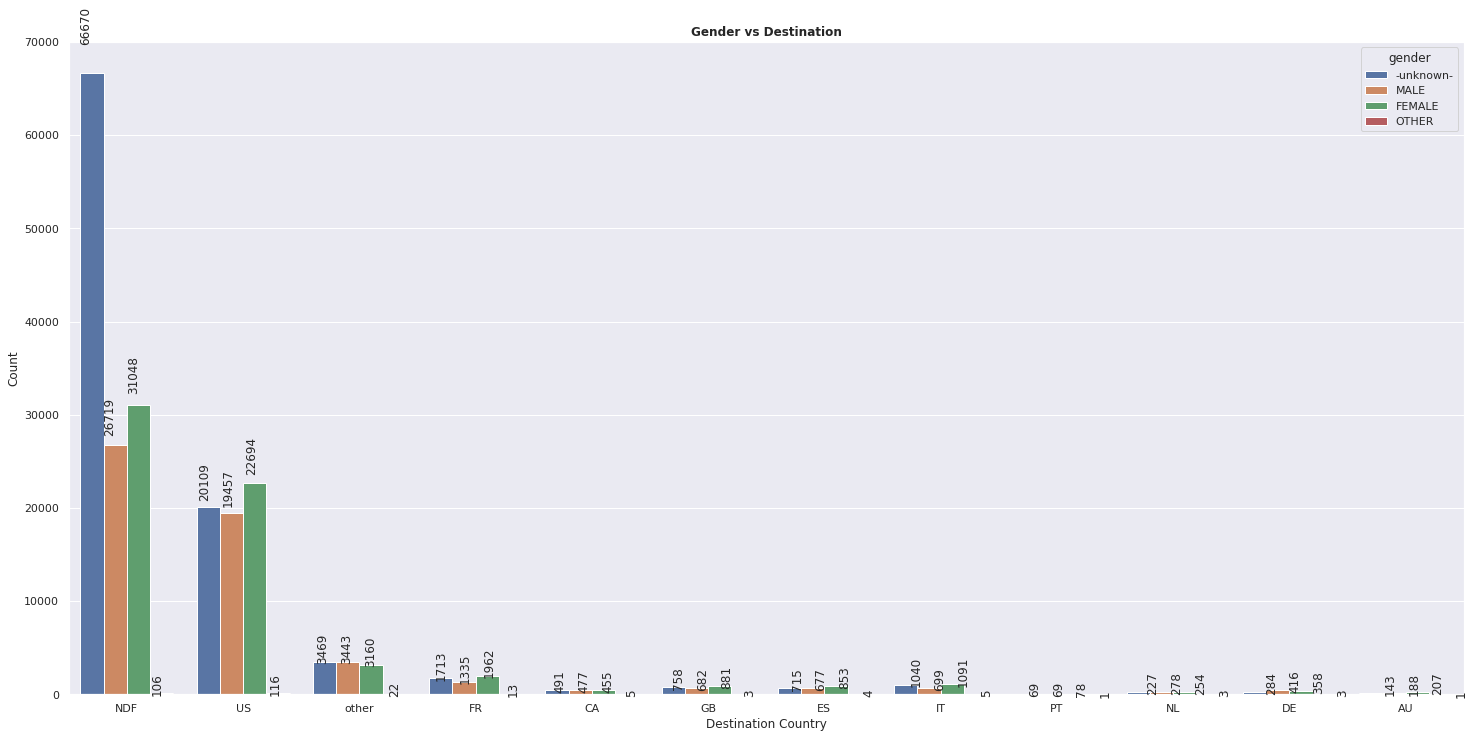

In [ ]:
#Bar plot to show the distribution of users w.r.t their genders and country destination:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_gen_ = sns.countplot(hue="gender", x="country_destination",data=train_set)
for p in ax_gen_.patches:
    ax_gen_.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Gender vs Destination",fontweight='bold')
plt.xlabel('Destination Country')
plt.ylabel('Count')
plt.show()

**Observations :**

* This plot gives us the distribution of gender of users w.r.t country destination.

* We observe that amongst those who preferred to say their gender, the majority of users who chose **'DE', 'NL','CA', 'other'** are **male** and similarly the majority of users who chose **'GB', 'US', 'FR', 'IT', 'ES', 'AU'** are **female**. Majority of the users who didn't choose any location **(i.e., NDF)** are **female**.

* After NDF, we find **'US'** as the most preferred location by both male and female users.  

####**AGE**

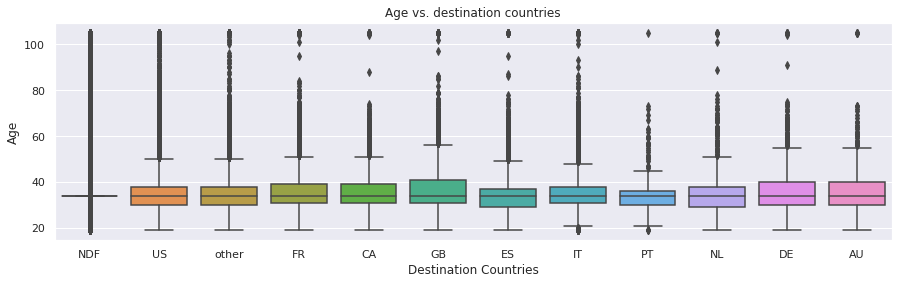

In [ ]:
#Box plot to show the distribution of users w.r.t their age and country destination:

plt.rcParams['figure.figsize'] = (15,4)
sns.boxplot(x='country_destination',y='age', data=train_set)
plt.xlabel('Destination Countries')
plt.ylabel('Age')
plt.title('Age vs. destination countries')
plt.show()

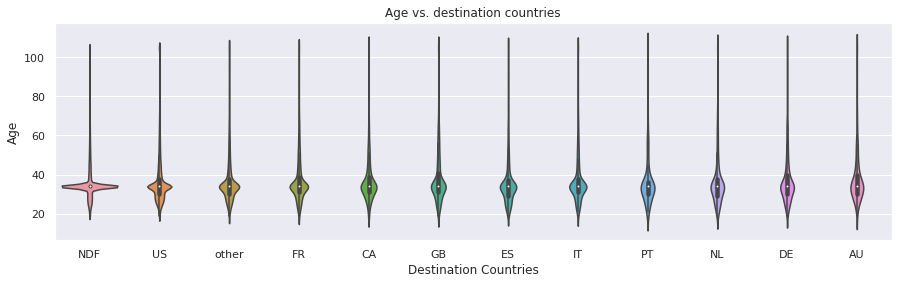

In [ ]:
#Violin plot to show the distribution of users w.r.t their age and country destination:

sns.violinplot(x='country_destination',y='age', data=train_set)
plt.xlabel('Destination Countries')
plt.ylabel('Age')
plt.title('Age vs. destination countries')
plt.show()

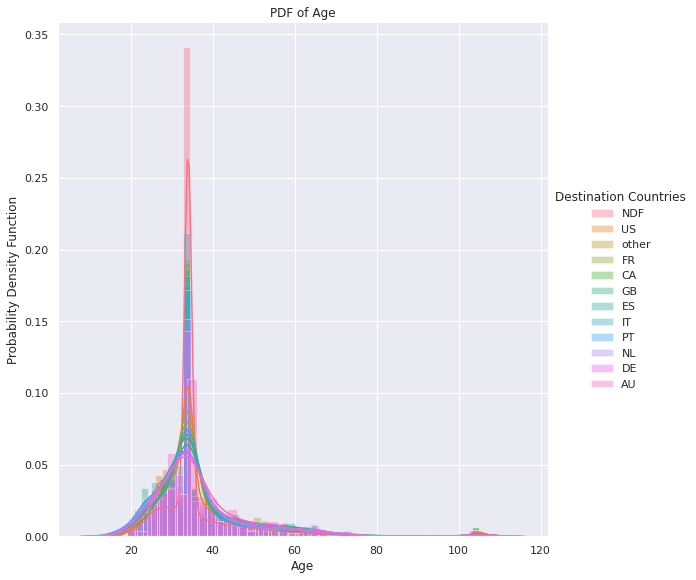

In [ ]:
#PDF to show the distribution of users w.r.t their age and country destination:

sns.FacetGrid(train_set, hue="country_destination", height=8) \
 .map(sns.distplot, "age") \
 .add_legend (title="Destination Countries");
plt.xlabel("Age")
plt.ylabel('Probability Density Function')
plt.title("PDF of Age")
plt.show();

**Observations :**

* From the above box plot, violin plot and PDF plot of age feature, we find that data is very overlapping.

* From the box plot, we observe that the median of age of users is almost same for each country destination. We observe that the IQR range for **AU, GB** is more than for those of others.

* As there is lot of overlapping, there is no clear criteria that can be defined for differentiating user's country destination based on age.

* But we can try bucketing the age groups in the interval of 5 years to understand relevance of age of user in determining user's country destination.

####**SIGNUP METHOD:**

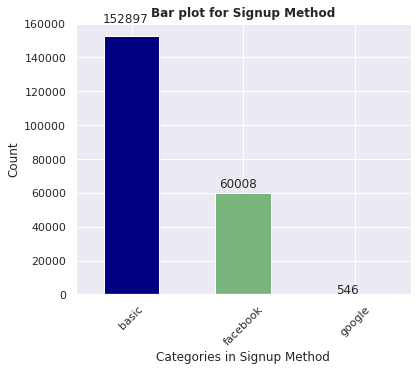

In [ ]:
#Bar plot to show the distribution of users w.r.t their signup method:

plt.figure(figsize = (6,5))
ax_sm = train_set.signup_method.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_sm.patches:
    ax_sm.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for Signup Method',fontweight='bold')
plt.xlabel('Categories in Signup Method')
plt.ylabel('Count')
plt.show()

**Observations :**

* This plot gives the distribution of users based on the signup method.

* Majority of the users (**71.63%** of users) use **basic** as their signup method followed by **facebook** as their signup method. 

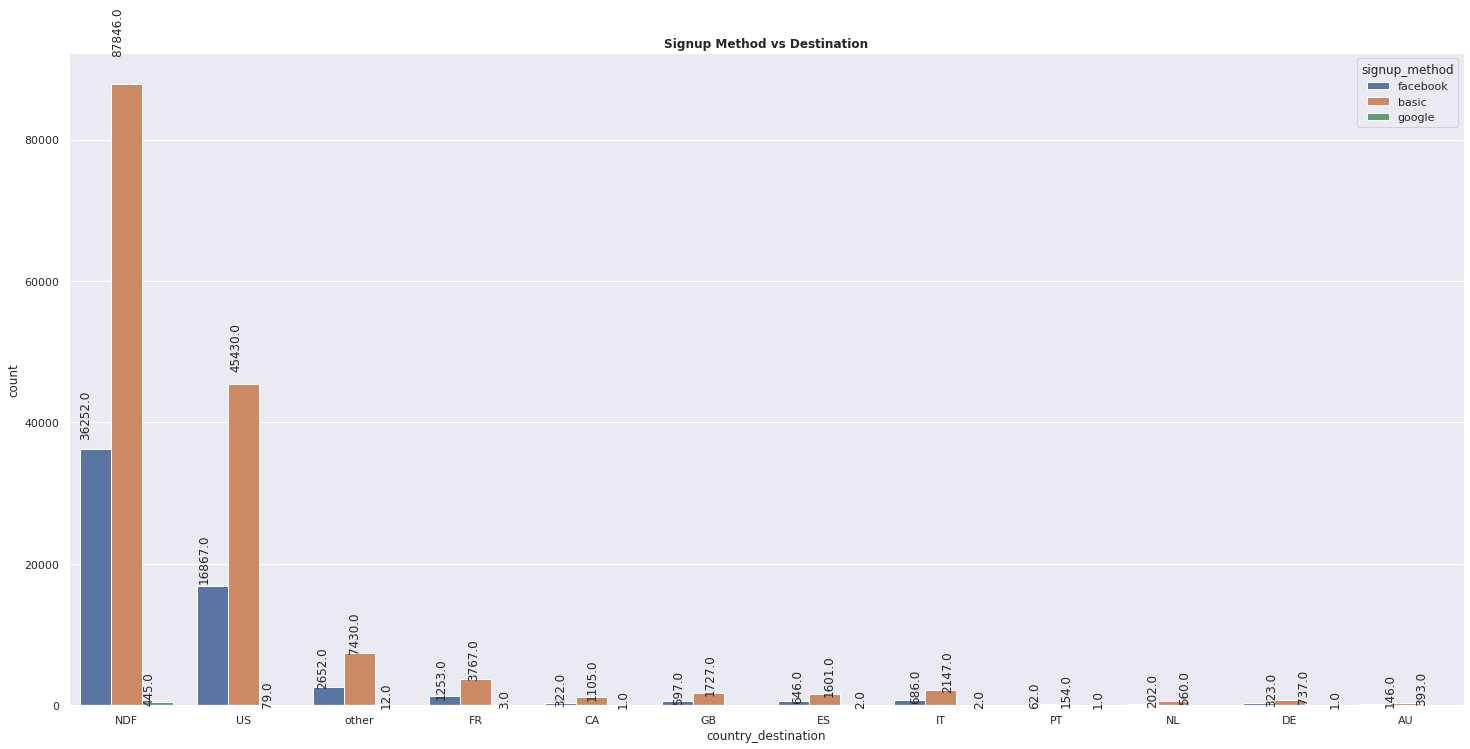

In [ ]:
#Bar plot to show the distribution of users w.r.t their Signup Method and country destination:
 
plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_sm_ = sns.countplot(hue="signup_method", x="country_destination",data=train_set)
for p in ax_sm_.patches:
    ax_sm_.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Signup Method vs Destination",fontweight='bold')
plt.show()

**Observations :**

* From the plot above, it is clear that majority of users used basic signup as their signup method irrespective of the country destination they chose.

* Hence, signup method individually may not be very helpful in differentiating the user's country destination. 

####**SIGNUP FLOW:**

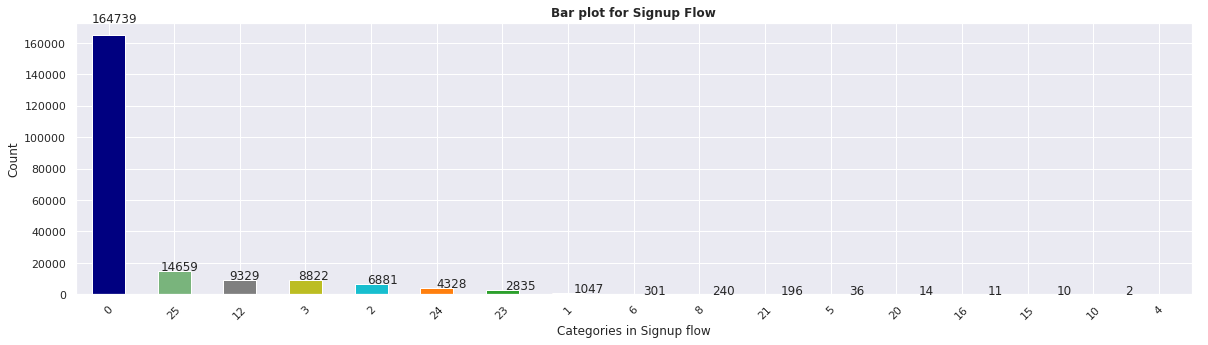

In [ ]:
#Bar plot to show the distribution of users w.r.t their signup flow:

plt.figure(figsize = (20,5))
ax_sf = train_set.signup_flow.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_sf.patches:
    ax_sf.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for Signup Flow',fontweight='bold')
plt.xlabel('Categories in Signup flow')
plt.ylabel('Count')
plt.savefig('Signupflow.jpg',orientation='landscape')
plt.show()

**Observations :**

* This plot gives the distribution of users based on the signup flow.

* About **77.18%** of users used **'0'** as the signup flow then followed by **'25'** as the signup flow.

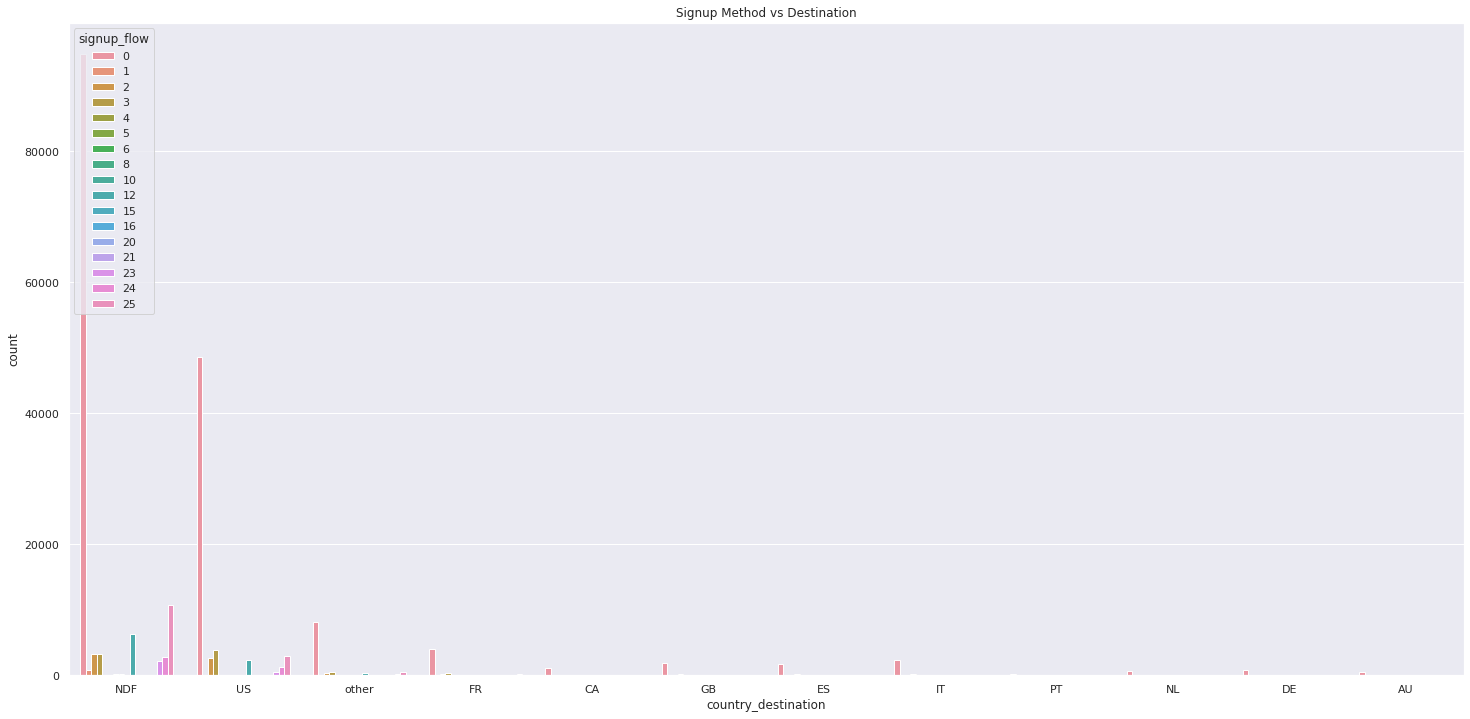

In [ ]:
#Bar plot to show the distribution of users w.r.t their Signup flow and country destination:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_sf_ = sns.countplot(hue="signup_flow", x="country_destination",data=train_set)
plt.title("Signup Method vs Destination")
plt.show()

**Observations :**

* From the above count plot, it is clear that irrespective of the user's country destination, the signup flow **'0'** has been chosen by majority of the users.

* Given that a user has chosen a particular country destination,we can clearly observe that the proportion of users selecting a particular signup flow is varying from one country destination to another. Hence, we can conclude that the feature 'signup flow' can be useful. 

####**LANGUAGE:**

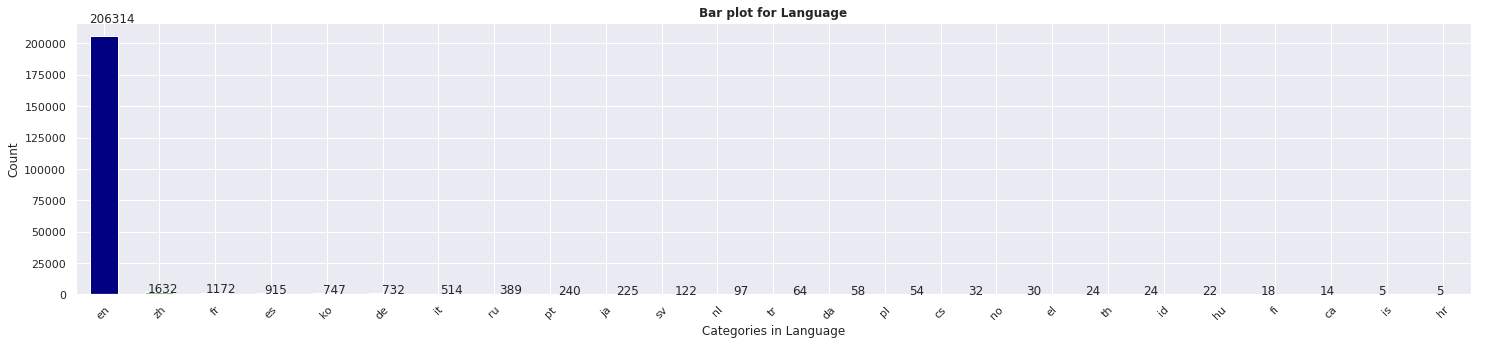

In [ ]:
#Bar plot to show the distribution of users w.r.t their language:

plt.figure(figsize = (25,5))
ax_lan = train_set.language.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_lan.patches:
    ax_lan.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for Language',fontweight='bold')
plt.xlabel('Categories in Language')
plt.ylabel('Count')
plt.savefig('Language.jpg',orientation='landscape')
plt.show()

**Observations :**

* This plot gives the distribution of users based on language.

* About 96.66 % of the users preferred English as their language. Hence, this feature can be considered as redundant feature.

**REMOVING FEATURE 'LANGUAGE' :**

In [ ]:
#Removing Feature 'Language':
train_set.drop(['language'],axis=1,inplace=True)

####**AFFILIATE CHANNEL:**

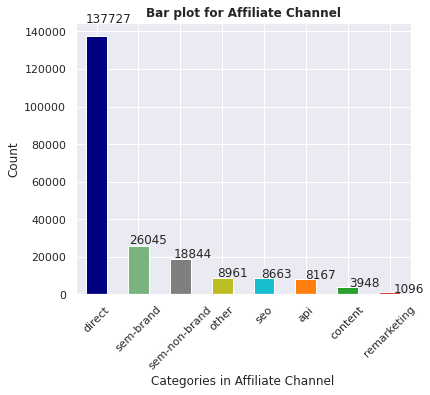

In [ ]:
#Bar plot to show the distribution of users w.r.t their affliate channel:

plt.figure(figsize = (6,5))
ax_ac = train_set.affiliate_channel.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_ac.patches:
    ax_ac.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for Affiliate Channel',fontweight = 'bold')
plt.xlabel('Categories in Affiliate Channel')
plt.ylabel('Count')
plt.show()

**Observations :**

* This plot gives the distribution of the users based on the affiliate channel used by the user.

* About **64.52%** of the users chose direct affiliate channel, followed by sem-brand affiliate channel.

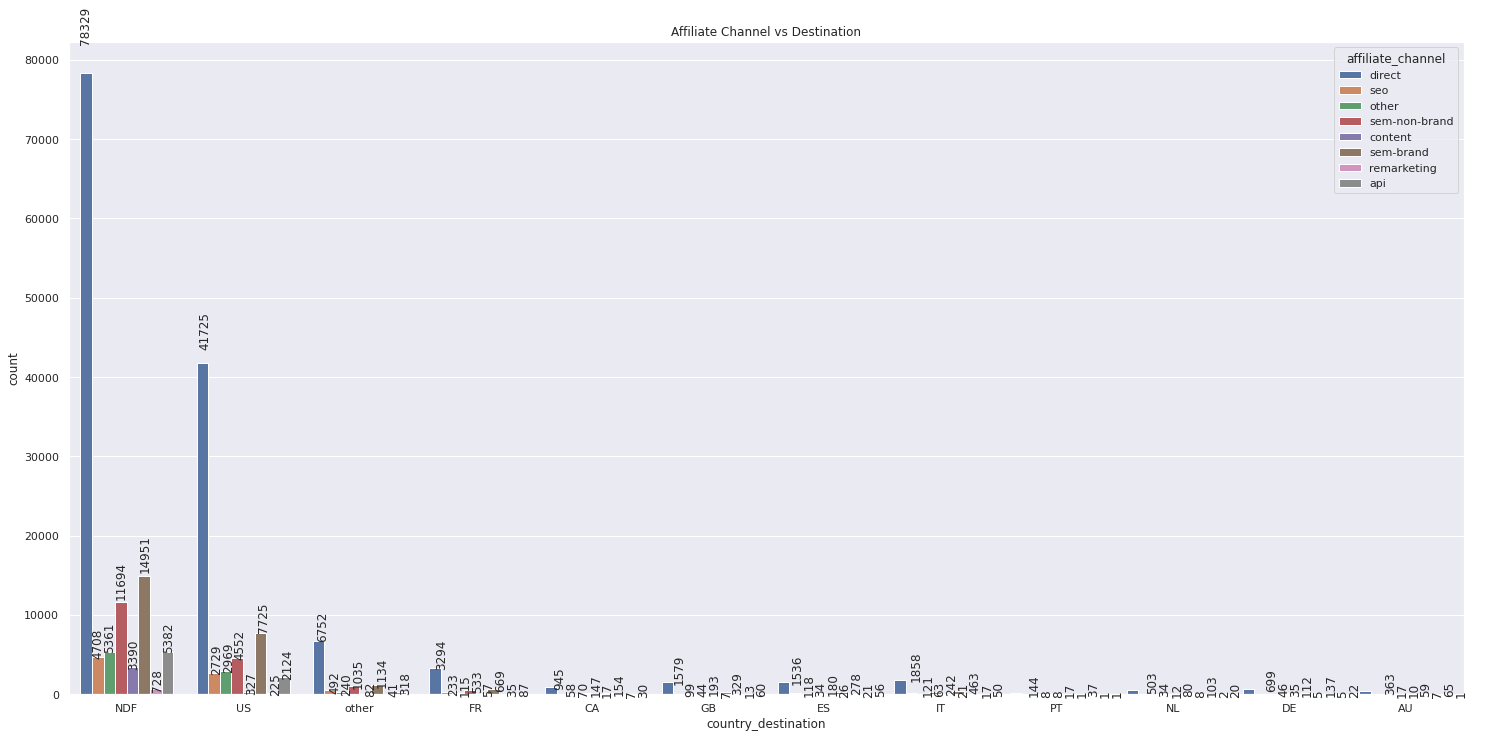

In [ ]:
#Bar plot to show the distribution of users w.r.t their affliate channel and country destination:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_ac_ = sns.countplot(hue="affiliate_channel", x="country_destination",data=train_set)
for p in ax_ac_.patches:
    ax_ac_.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Affiliate Channel vs Destination")
plt.show()

**Observations :**

* From the count plot,  it is clear that irrespective of the user's country destination, direct affiliate channel has been chosen by majority of the users.

* Given that a user has chosen a particular country destination,we can clearly observe that the proportion of users selecting a particular affiliate channel is varying from one country destination to another. Hence, we can conclude that the feature 'affiliate channel' can be useful. 

####**AFFILIATE PROVIDER:**

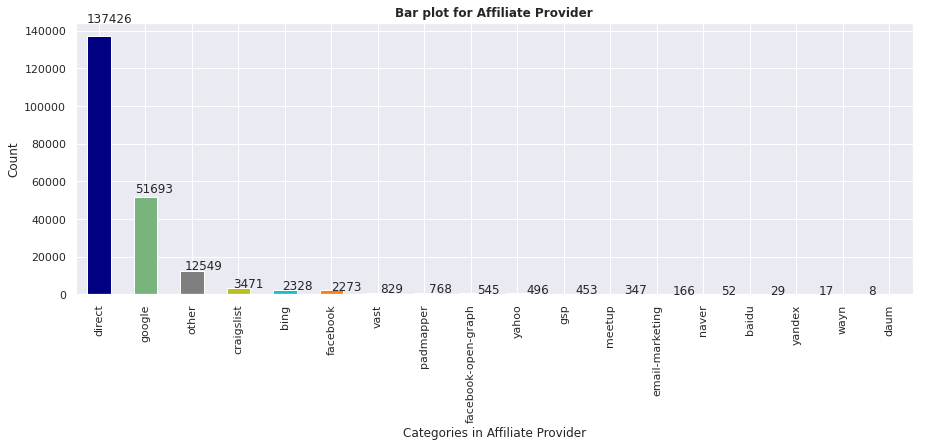

In [ ]:
#Bar plot to show the distribution of users w.r.t their affliate provider:

plt.figure(figsize = (15,5))
ax_ap = train_set.affiliate_provider.value_counts().plot(kind='bar', color = colors,rot=90)
for p in ax_ap.patches:
    ax_ap.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for Affiliate Provider',fontweight='bold')
plt.xlabel('Categories in Affiliate Provider')
plt.ylabel('Count')
plt.show()

**Observations :**

* This plot gives the distribution of the users based on the affiliate provider used by the user.

* About **64.38%** of the users chose direct as affiliate provider, followed by google as affiliate provider. 

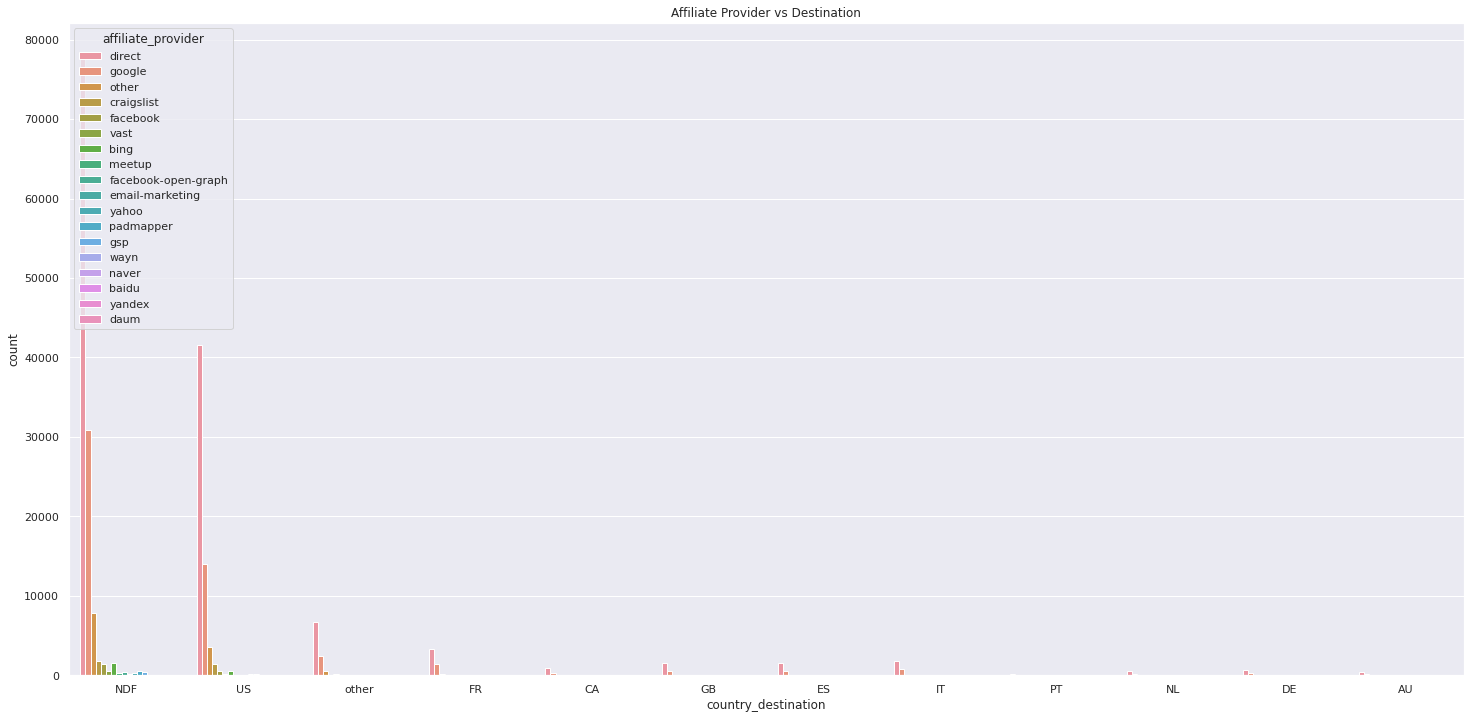

In [ ]:
#Bar plot to show the distribution of users w.r.t their affliate provider and country destination:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_ap_ = sns.countplot(hue="affiliate_provider", x="country_destination",data=train_set)
plt.title("Affiliate Provider vs Destination")
plt.show()

**Observations :**

* From the count plot,  it is clear that irrespective of the user's country destination, direct affiliate provider has been chosen by majority of the users.

* Given that a user has chosen a particular country destination,we can clearly observe that the proportion of users selecting a particular affiliate provider is varying from one country destination to another. Hence, we can conclude that the feature 'affiliate provider' can be useful. 

####**FIRST AFFILIATE TRACKED:**

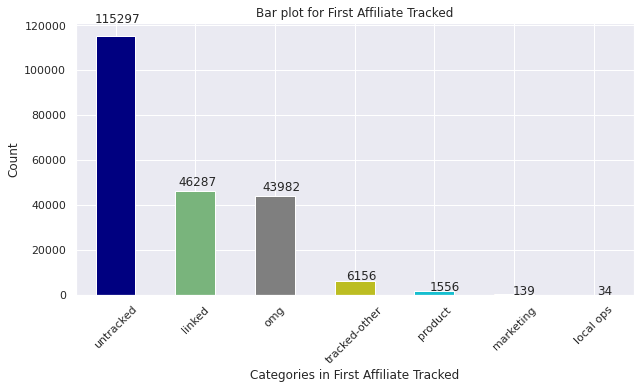

In [ ]:
#Bar plot to show the distribution of users w.r.t their first affliate tracked mode:

plt.figure(figsize = (10,5))
ax_fat = train_set.first_affiliate_tracked.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_fat.patches:
    ax_fat.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for First Affiliate Tracked')
plt.xlabel('Categories in First Affiliate Tracked')
plt.ylabel('Count')
plt.show()

**Observations :**

* This plot gives the distribution of the users based on the First affiliate tracked.

* About **54.01%** of the users first affiliate is untracked.

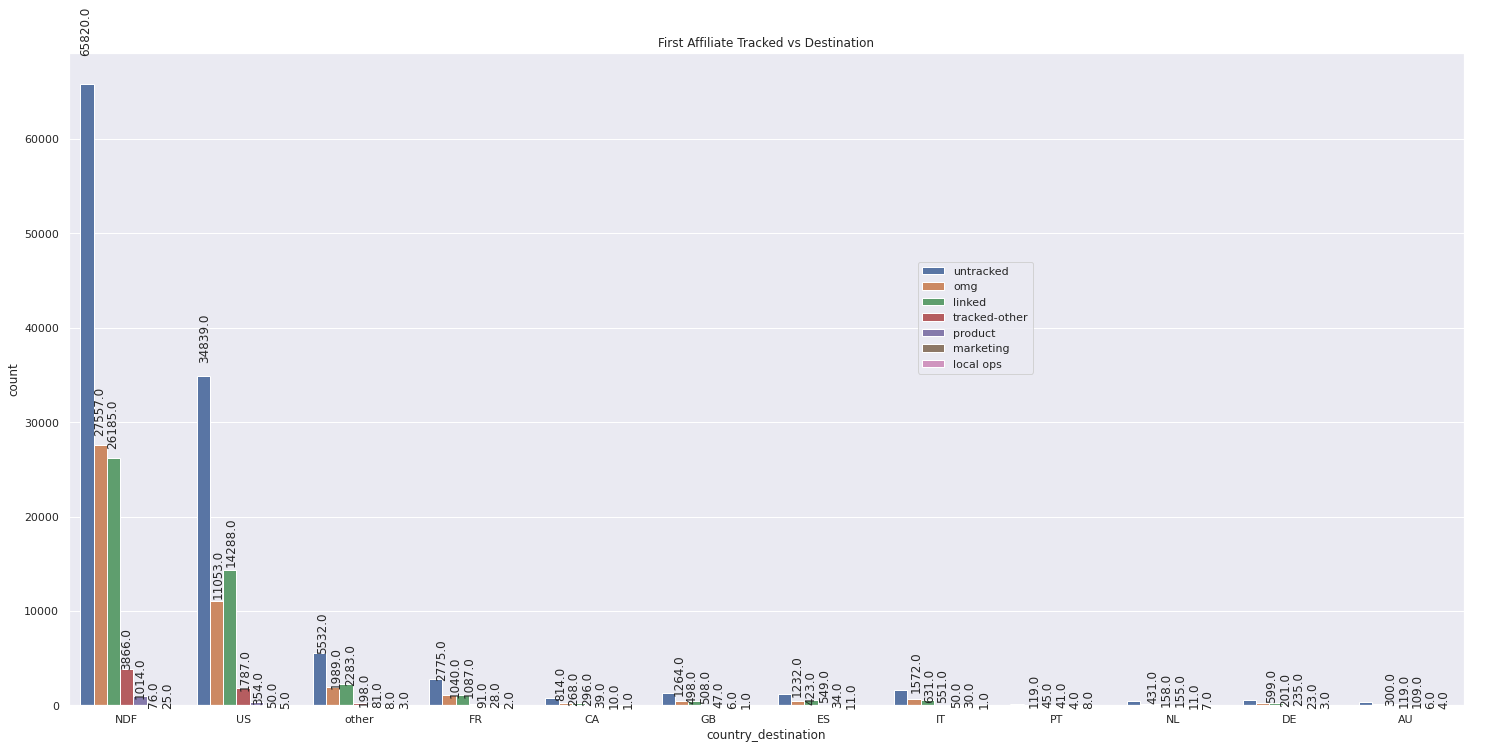

In [ ]:
#Bar plot to show the distribution of users w.r.t their first affliate tracked mode and country destination:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_fat_ = sns.countplot(hue="first_affiliate_tracked", x="country_destination",data=train_set)
for p in ax_fat_.patches:
    ax_fat_.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("First Affiliate Tracked vs Destination")
plt.legend(bbox_to_anchor =(0.65,0.5))
plt.show()

**Observations :**

* From the count plot,  it is clear that irrespective of the user's country destination, majority of the users' first affiliate is untracked.

* Given that a user has chosen a particular country destination,we can clearly observe that the proportion of users selecting a particular first affiliate tracked mode is varying from one country destination to another. Hence, we can conclude that the feature 'first affiliate tracked mode' can be useful. 

####**SIGNUP APP:**

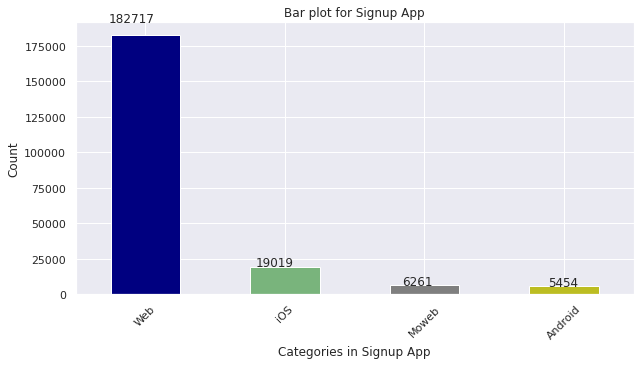

In [ ]:
#Bar plot to show the distribution of users w.r.t their signup app:

plt.figure(figsize = (10,5))
ax_sap = train_set.signup_app.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_sap.patches:
    ax_sap.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for Signup App')
plt.xlabel('Categories in Signup App')
plt.ylabel('Count')
plt.show()

**Observations :**

* This plot gives the distribution of the users based on the Signup app.

* About **85.60%** of the users signup app is web followed by iOS.

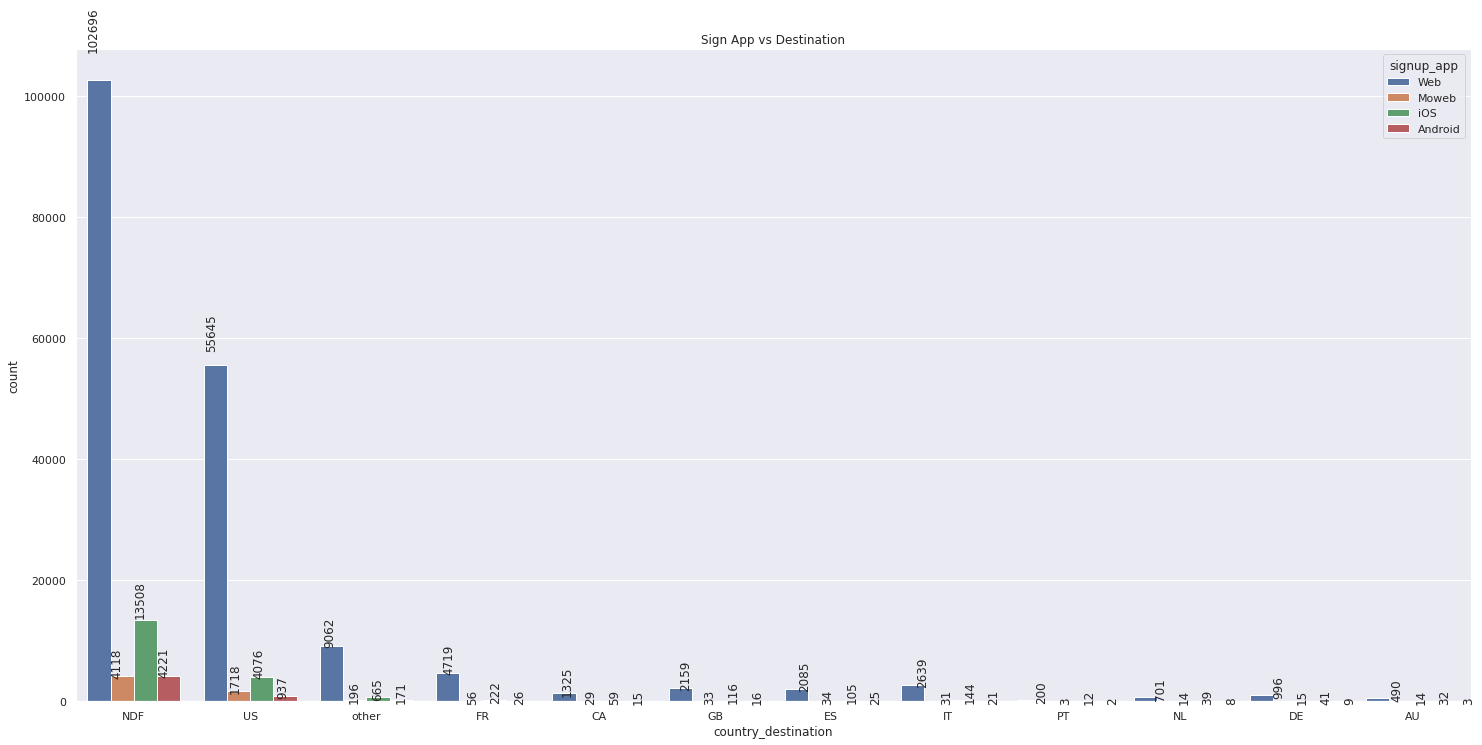

In [ ]:
#Bar plot to show the distribution of users w.r.t their signup app and country destination:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_sap_ = sns.countplot(hue="signup_app", x="country_destination",data=train_set)
for p in ax_sap_.patches:
    ax_sap_.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Sign App vs Destination")
plt.show()

**Observations :**

* From the count plot,  it is clear that irrespective of the user's country destination, majority of the users' used web as their signup app.

* Given that a user has chosen a particular country destination,we can clearly observe that the proportion of users selecting a particular signup app is varying from one country destination to another. Hence, we can conclude that the feature 'signup app' can be useful. 

####**FIRST DEVICE TYPE:**

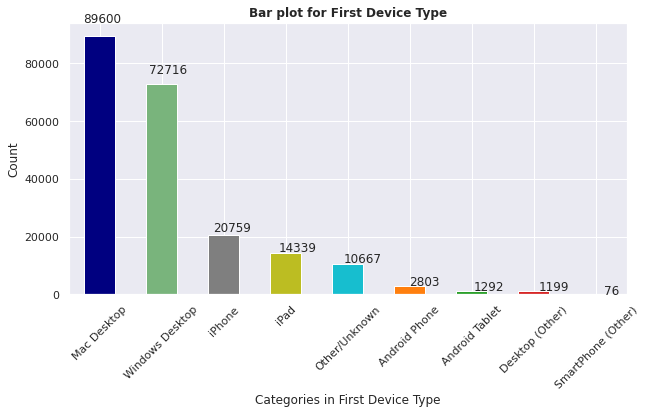

In [ ]:
#Bar plot to show the distribution of users w.r.t their first device type used:

plt.figure(figsize = (10,5))
ax_fdt = train_set.first_device_type.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_fdt.patches:
    ax_fdt.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for First Device Type',fontweight='bold')
plt.xlabel('Categories in First Device Type')
plt.ylabel('Count')
plt.show()

**Observations :**

* This plot gives the distribution of the users based on the First device type used by the user.

* About **41.97%** of the users used Mac desktop as their first device while **34.07%** of users used Windows desktop as their first device.

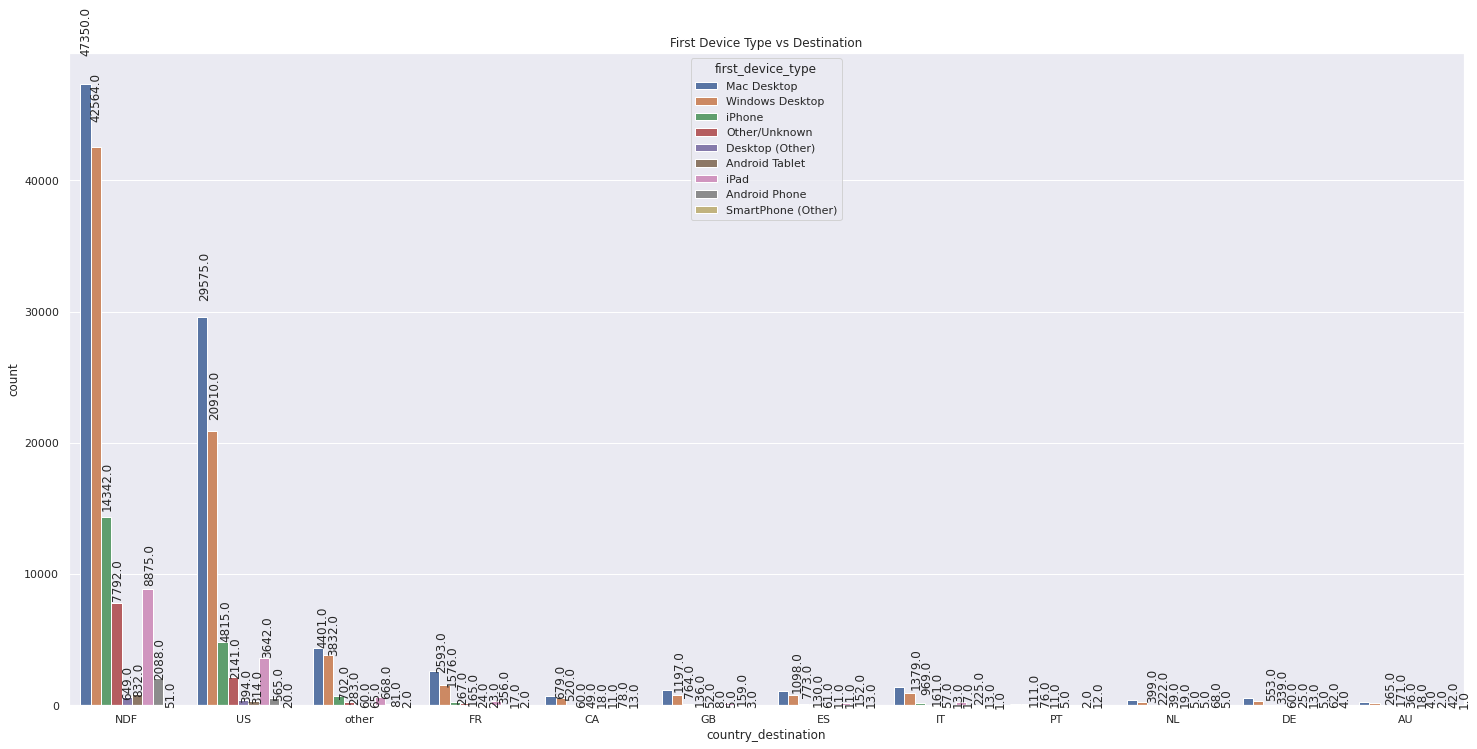

In [ ]:
#Bar plot to show the distribution of users w.r.t their first device type used and country destination:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_fdt_ = sns.countplot(hue="first_device_type", x="country_destination",data=train_set)
for p in ax_fdt_.patches:
    ax_fdt_.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("First Device Type vs Destination")
plt.show()

**Observations :**

* From the count plot,  it is clear that irrespective of the user's country destination, majority of the users' used first device as Mac Desktop.

* Given that a user has chosen a particular country destination,we can clearly observe that the proportion of users who used a particular device type is varying from one country destination to another. Hence, we can conclude that the feature 'first device type' can be useful. 


####**FIRST BROWSER:**

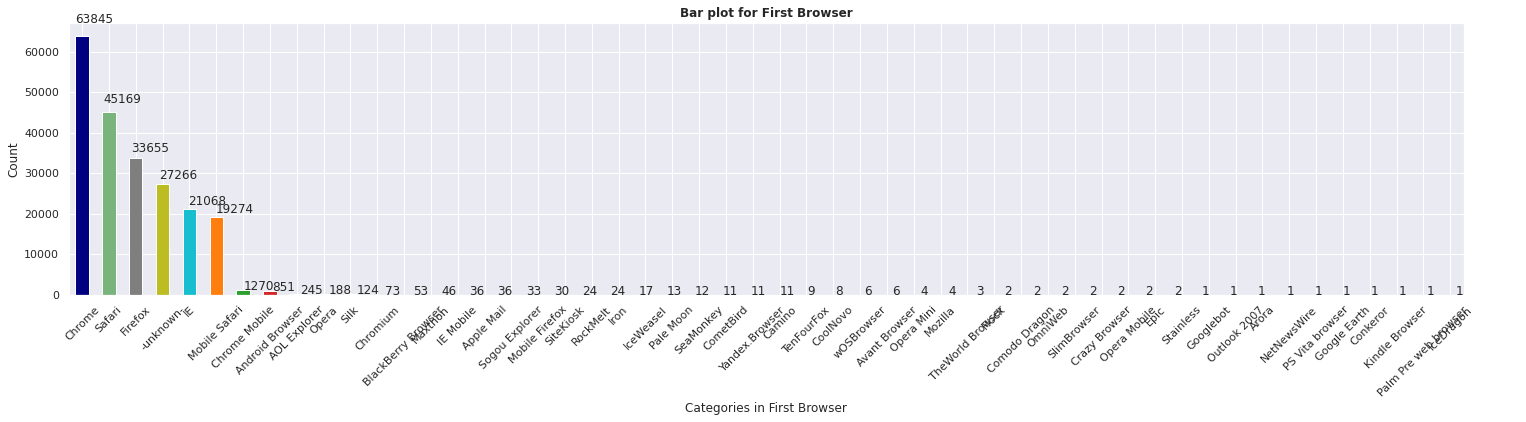

In [ ]:
#Bar plot to show the distribution of users w.r.t their first browser used:

plt.figure(figsize = (25,5))
ax_br = train_set.first_browser.value_counts().plot(kind='bar', color = colors,rot=45)
for p in ax_br.patches:
    ax_br.annotate(str(p.get_height()), (p.get_x()*1.05, p.get_height() * 1.05))
plt.title('Bar plot for First Browser',fontweight='bold')
plt.xlabel('Categories in First Browser')
plt.ylabel('Count')
plt.savefig('FirstBrowser.jpg',orientation='landscape')
plt.show()

**Observations :**

* This plot gives the distribution of the users based on the first browser.

* About **29.91%** of the users used chrome as their first browser followed by safari.

* There are few browsers which are used by less than 10 users. These categories can be made into another category by name 'others'.

**GROUPING THE BROWSERS THAT ARE USED BY LESS THAN 10 AS OTHERS**

In [ ]:
train_set.first_browser.unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
       'Chrome Mobile', 'RockMelt', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'TenFourFox', 'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'SeaMonkey', 'Iron', 'Sogou Explorer',
       'IceWeasel', 'Opera Mini', 'SiteKiosk', 'Maxthon',
       'Kindle Browser', 'CoolNovo', 'Conkeror', 'wOSBrowser',
       'Google Earth', 'Crazy Browser', 'Mozilla', 'OmniWeb',
       'PS Vita browser', 'NetNewsWire', 'CometBird', 'Comodo Dragon',
       'Flock', 'Pale Moon', 'Avant Browser', 'Opera Mobile',
       'Yandex.Browser', 'TheWorld Browser', 'SlimBrowser', 'Epic',
       'Stainless', 'Googlebot', 'Outlook 2007', 'IceDragon'],
      dtype=object)

In [ ]:
train_set.first_browser.replace([ 'Yandex.Browser', 'SiteKiosk','IceWeasel', 'Iron','Pale Moon','CoolNovo','Opera Mini','wOSBrowser',\
                                     'SeaMonkey','TenFourFox', 'Mozilla','Googlebot','Outlook 2007','IceDragon','TheWorld Browser', 'RockMelt', 'Avant Browser'],\
                                     'Others',inplace = True)

In [ ]:
train_set.first_browser.unique()

array(['Chrome', 'IE', 'Firefox', 'Safari', '-unknown-', 'Mobile Safari',
       'Chrome Mobile', 'Others', 'Chromium', 'Android Browser',
       'AOL Explorer', 'Palm Pre web browser', 'Mobile Firefox', 'Opera',
       'IE Mobile', 'Apple Mail', 'Silk', 'Camino', 'Arora',
       'BlackBerry Browser', 'Sogou Explorer', 'Maxthon',
       'Kindle Browser', 'Conkeror', 'Google Earth', 'Crazy Browser',
       'OmniWeb', 'PS Vita browser', 'NetNewsWire', 'CometBird',
       'Comodo Dragon', 'Flock', 'Opera Mobile', 'SlimBrowser', 'Epic',
       'Stainless'], dtype=object)

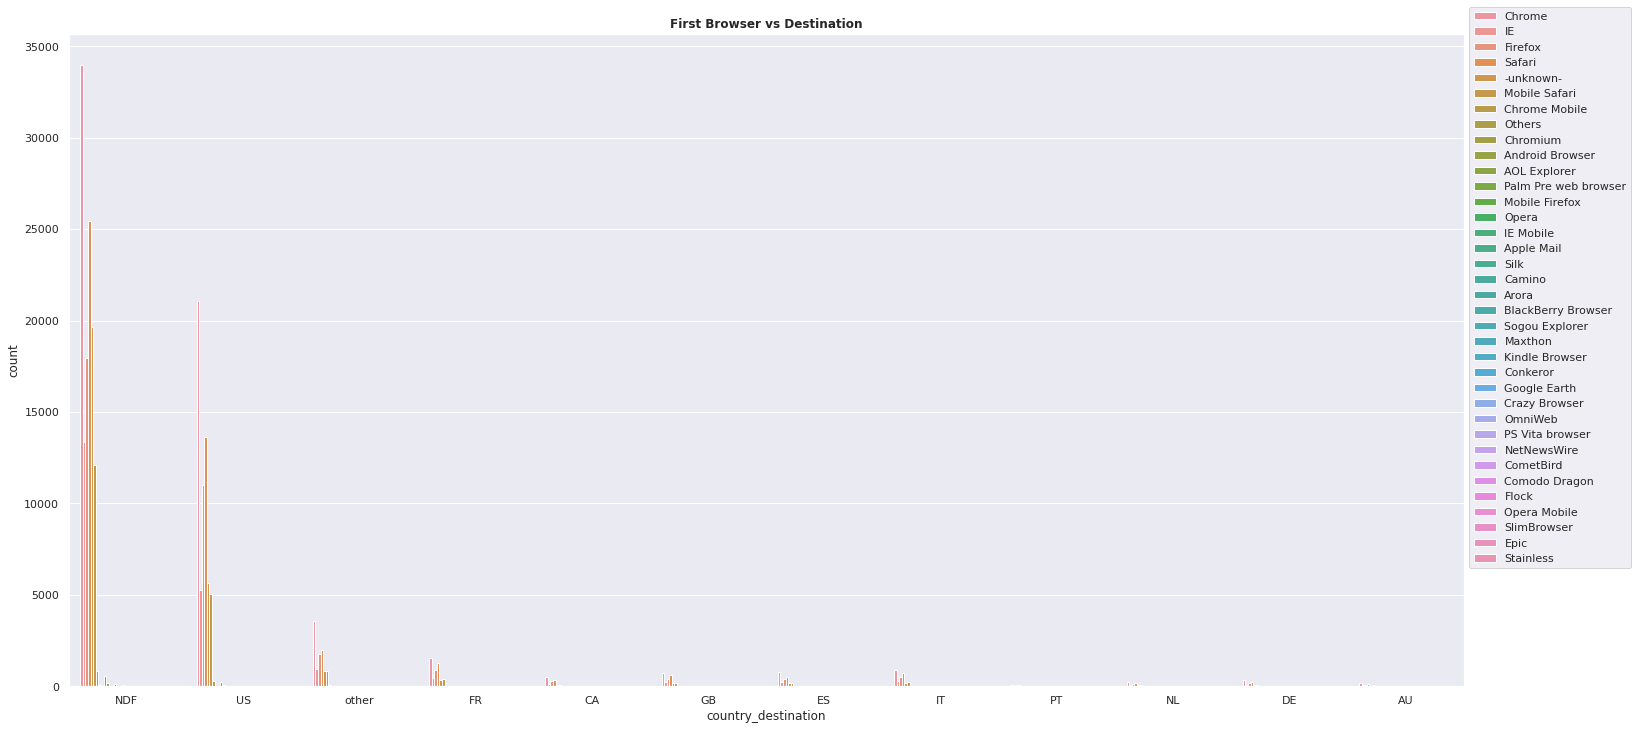

In [ ]:
#Bar plot to show the distribution of users w.r.t their first browser type used and country destination:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_br_ = sns.countplot(hue="first_browser", x="country_destination",data=train_set)
plt.title("First Browser vs Destination",fontweight='bold')
plt.legend(bbox_to_anchor =(1, 1.05))
#plt.savefig("FirstbrowserVsD.jpg",orientation = 'landscape')
plt.show()

**Observations :**

* From the count plot,  it is clear that irrespective of the user's country destination, majority of the users used **chrome** as their first browser.

* Given that a user has chosen a particular country destination,we can clearly observe that the proportion of users who used a particular browser is varying from one country destination to another. Hence, we can conclude that the feature 'first browser type' can be useful. 


###**BIVARIATE ANALYSIS:**

####**GENDER - AGE - COUNTRY DESTINATION:**

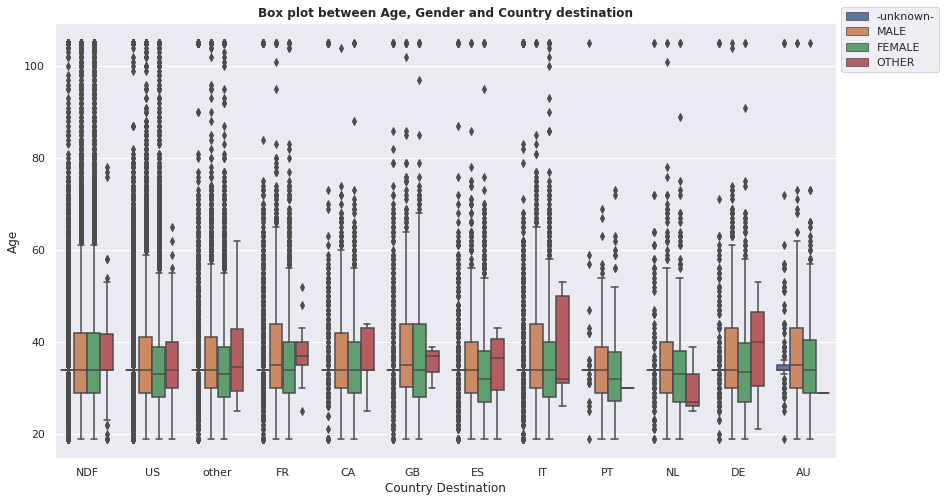

In [ ]:
#Box plot between Age, Gender and Country destination :

plt.figure(figsize=(14,8))
sns.boxplot(data=train_set ,y='age',x='country_destination',hue='gender')
plt.xlabel('Country Destination')
plt.ylabel('Age')
plt.title('Box plot between Age, Gender and Country destination',fontweight = 'bold')
plt.legend(bbox_to_anchor =(1, 1.05))
plt.show()

**Observations:**

* Female users are younger than male users. 
* We find most of the female users have aged between 30 and 40. Older females prefer to travel to GB. Younger females preferred to travel to PT, ES, and DE.
* We find most of the male users have aged between 30 to 45. Older male users preferred to go to FR, GB, and IT, and younger males chose to go to PT.
* We find the most older users are from the other category.
* Hence, from the box plot above, we can conclude that age and gender are related.

####**GENDER - FIRST DEVICE TYPE - COUNTRY DESTINATION :**

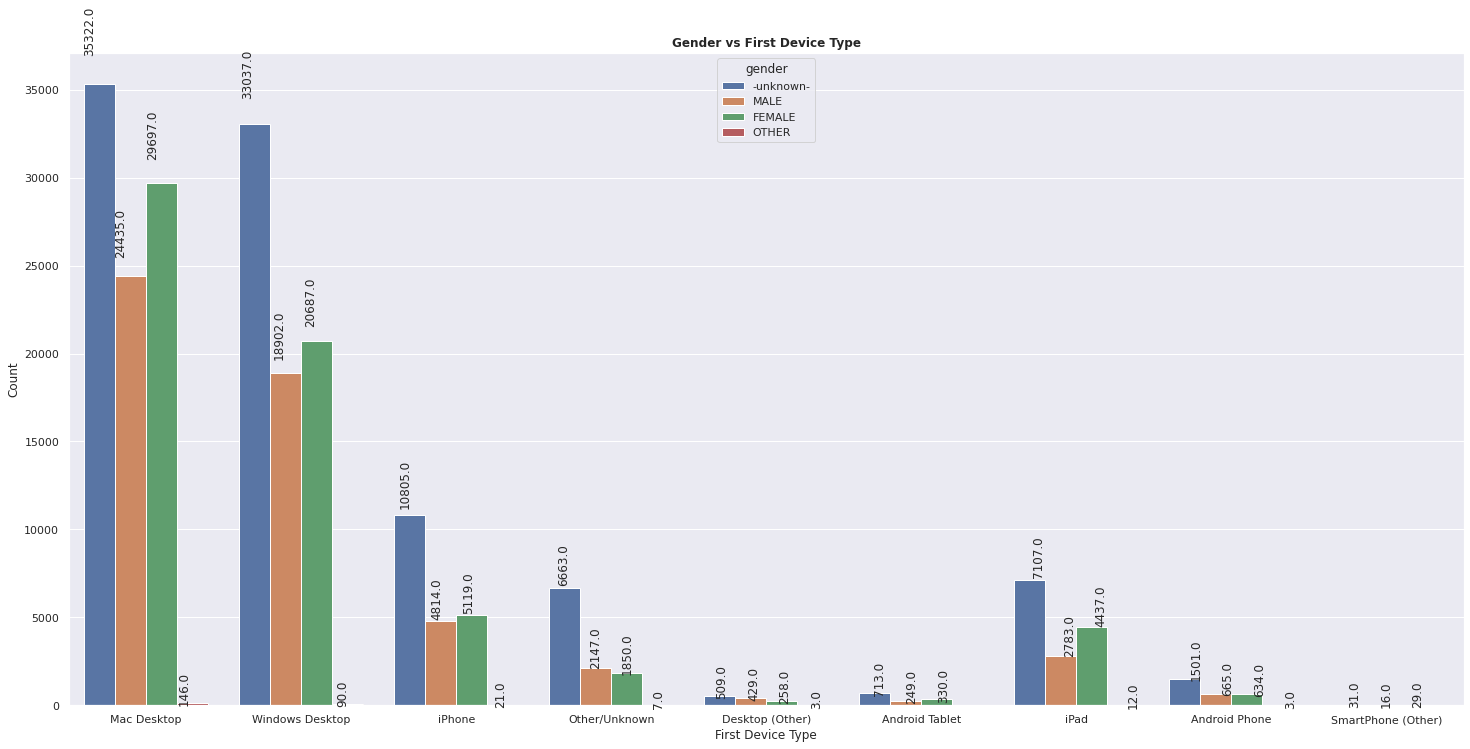

In [ ]:
#Bar plot that shows the distribution of users w.r.t gender and first device type:

plt.figure(figsize=(25,12))
sns.set(style="darkgrid")
ax_genf = sns.countplot(hue="gender", x="first_device_type",data=train_set)
for p in ax_genf.patches:
    ax_genf.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Gender vs First Device Type",fontweight='bold')
plt.xlabel('First Device Type')
plt.ylabel('Count')
plt.show()

**Observations:**

* Mac Desktop is the most used first device irrespective of the gender of the user. The second most first device used by the users is Windows Desktop.
* The number of male users who used Android phones and other/Unknown devices is more than Female users.

In [ ]:
#Using Crosstab to count the users who chose a particular country destination against various combinations of subcategories in gender and Device Type:

cross = pd.crosstab(train_set.country_destination, 
                    [train_set.gender,
                     train_set.first_device_type])

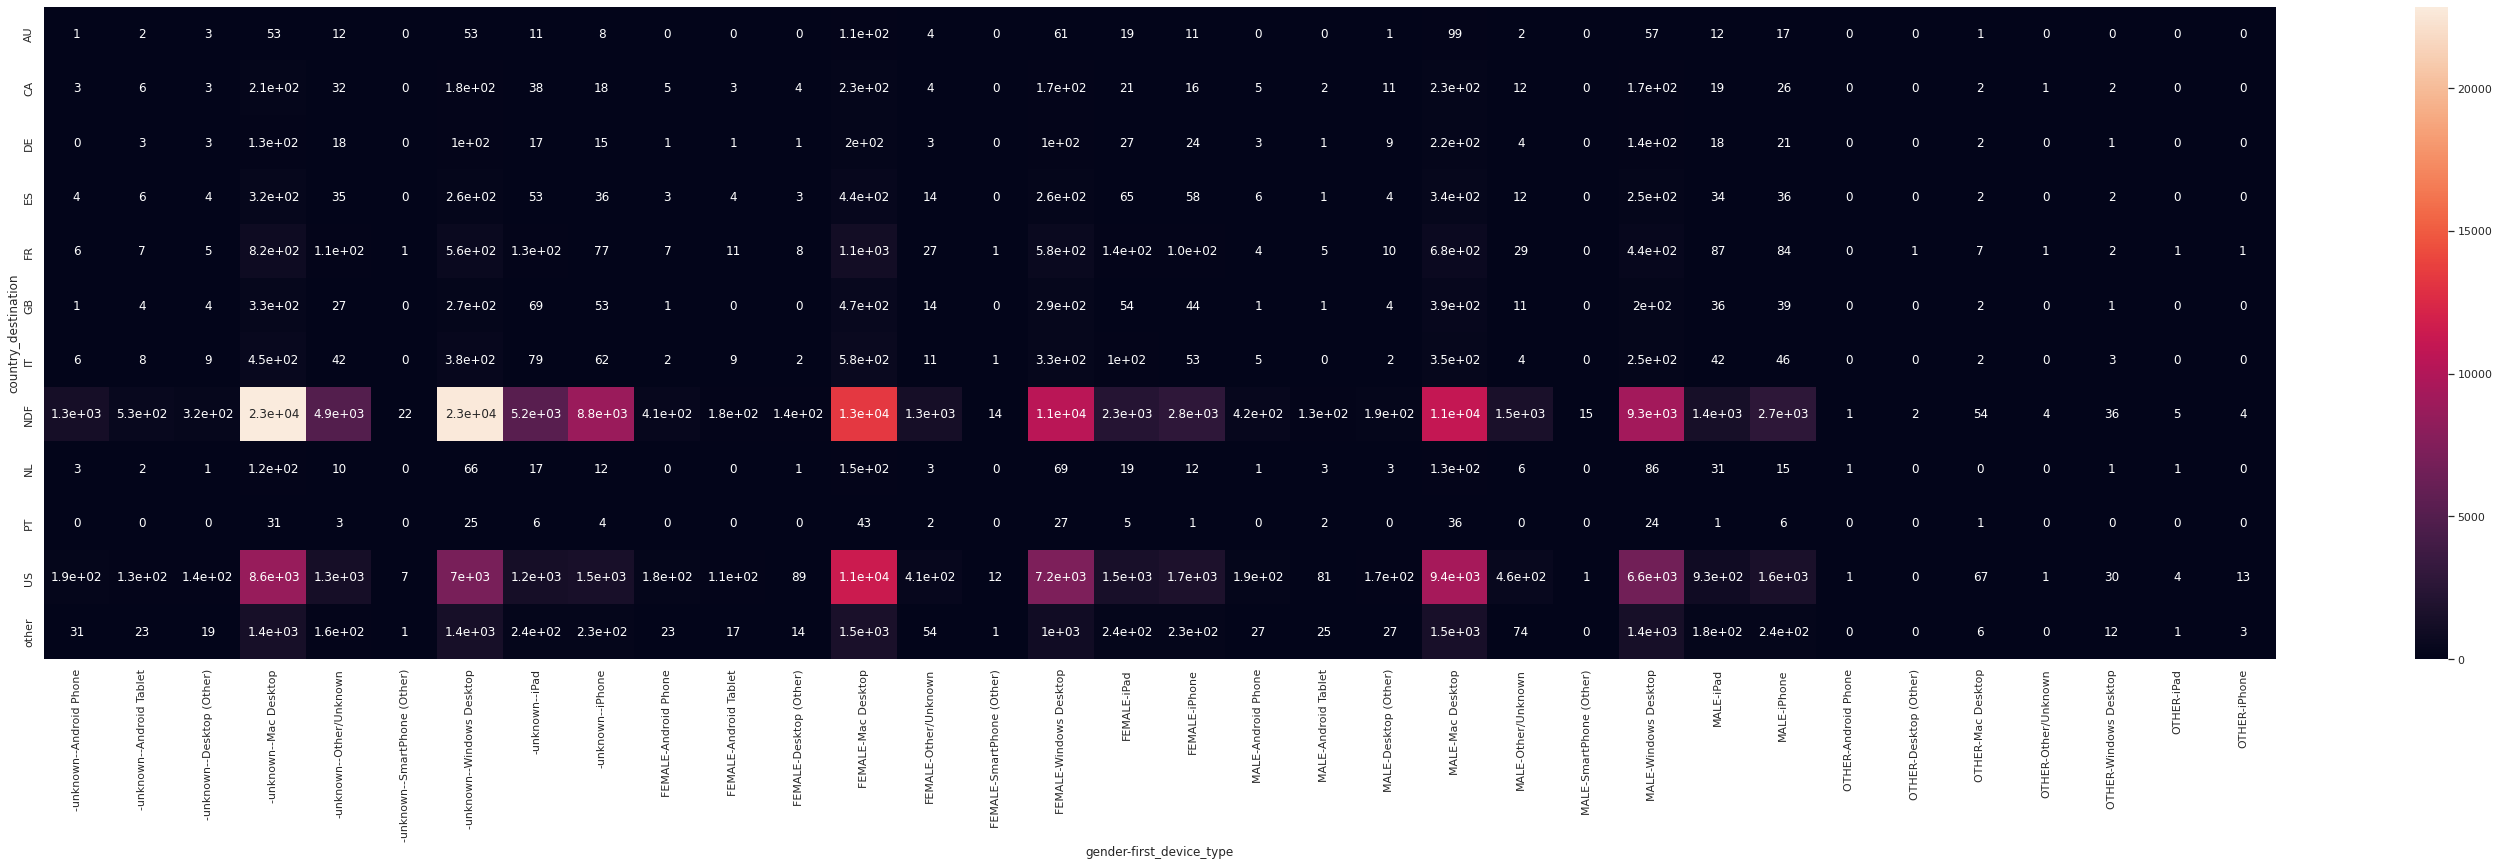

In [ ]:
#Plotting a heatmap to represent the above cross table:
plt.figure(figsize=(50,12))
sns.heatmap(cross,annot=True)
plt.show()

**Observations :**

* The heatmap above gives a summary of the distribution of users based on gender and device type given that they have chosen a particular destination. 

* Given that a user has chosen a particular country destination,we can clearly observe that the proportion of users belonging to a particular gender and who has used a particular is varying from one country destination to another. 

  For example, amongst users who chose US as country destination, male users who used Smartphone as first device are 0 while that of female are 5.

Hence, we can conclude that the features 'gender' and 'first device type' as a combination can be useful. 

####**GENDER - AFFILIATE CHANNEL - COUNTRY DESTINATION :**

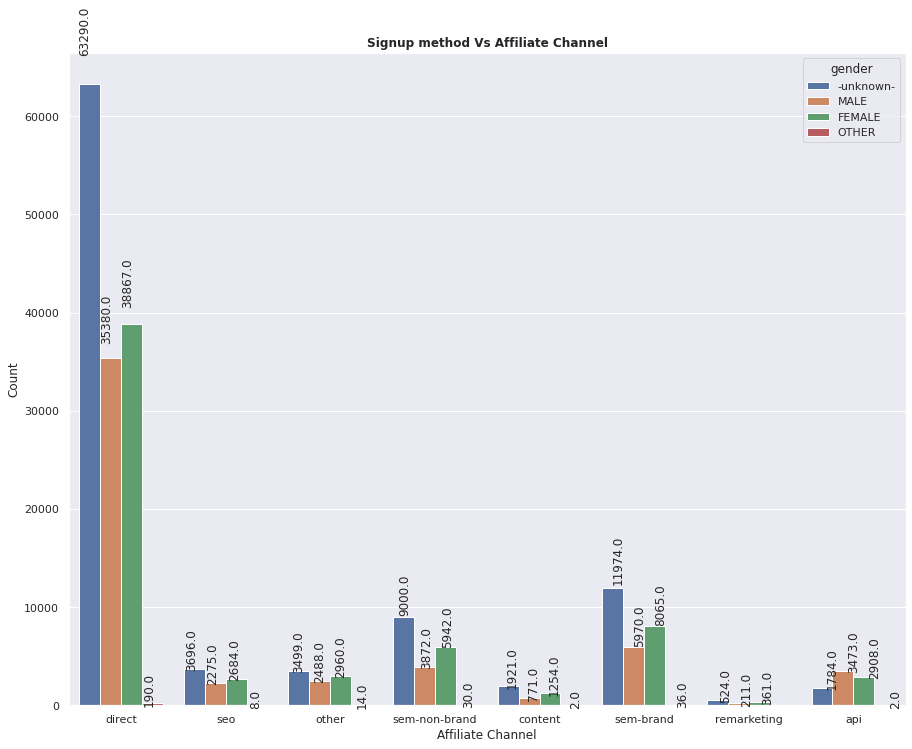

In [ ]:
#Bar plot that shows the distribution of users w.r.t gender and affiliate channel:

plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
ax_gen_ac = sns.countplot(hue="gender", x="affiliate_channel",data=train_set)
for p in ax_gen_ac.patches:
    ax_gen_ac.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Signup method Vs Affiliate Channel",fontweight='bold')
plt.xlabel('Affiliate Channel')
plt.ylabel('Count')
plt.show()

**Observations :**

* Irrespective of gender, the most followed affiliate channel is the direct affiliate channel.
* Among the users who preferred to say their gender, more male users followed the API affiliate channel compared to females. In all the other affiliate channels, female users are more in number when compared to males.
* Hence, the combination of features 'gender' and 'affiliate channel' can be helpful in the classification task.

####**AGE - FIRST DEVICE TYPE - COUNTRY DESTINATION :**


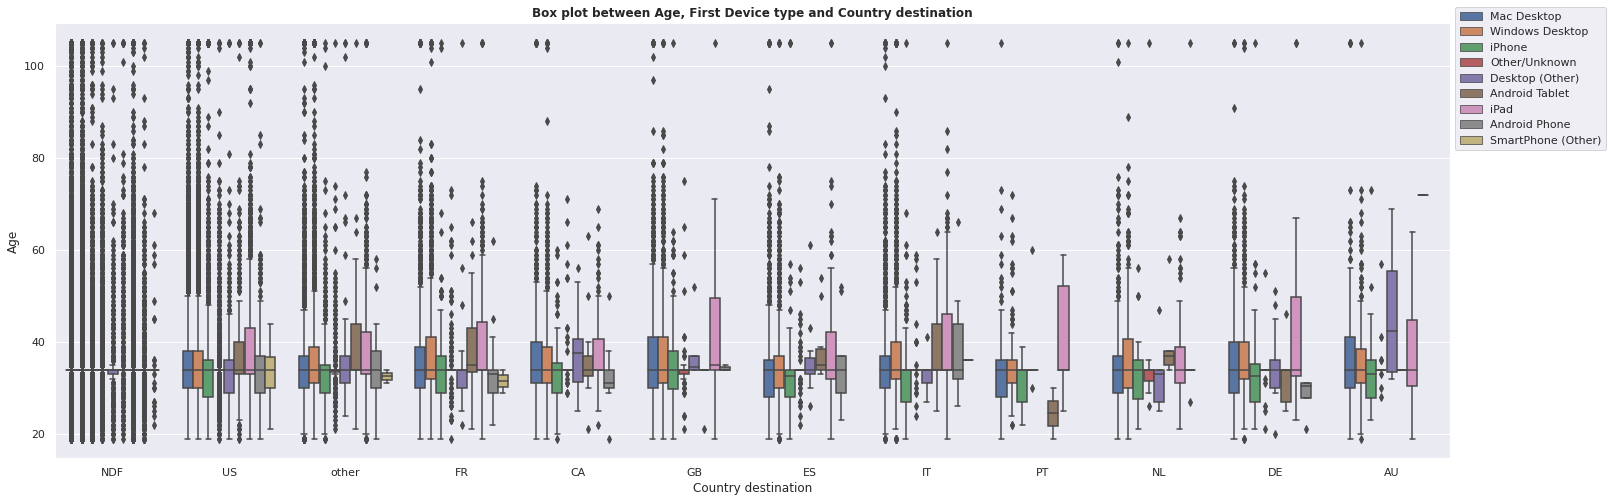

In [ ]:
#Box plot between Age, First Device type and Country destination :

plt.figure(figsize=(25,8))
sns.boxplot(data=train_set ,y='age',x='country_destination',hue='first_device_type')
plt.xlabel('Country destination')
plt.ylabel('Age')
plt.title('Box plot between Age, First Device type and Country destination',fontweight = 'bold')
plt.legend(bbox_to_anchor =(1, 1.05))
plt.savefig('AD.jpg',orientation='landscape')
plt.show()

**Observations :**

* Irrespective of the travel destination, most users who used the iPad as their first device were above 40 years. 
* Most younger users who traveled to PT used Android tablets as their first device.
* We can deduce that the first device type is dependent on age. It is true because as a person gets older, one's income and standard of living increase and therefore use better and costlier products.

####**FIRST DEVICE TYPE - SIGNUP APP - COUNTRY DESTINATION :**

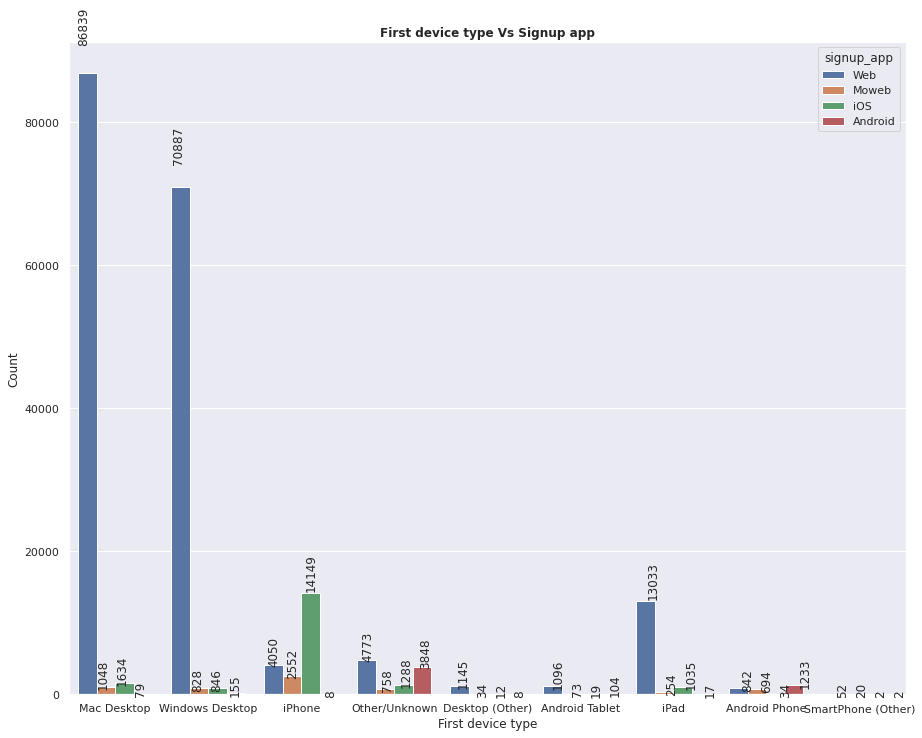

In [ ]:
#Bar plot that shows the distribution of users w.r.t first device type and signup app:

plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
ax_genf = sns.countplot(hue="signup_app", x="first_device_type",data=train_set)
for p in ax_genf.patches:
    ax_genf.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("First device type Vs Signup app",fontweight='bold')
plt.xlabel('First device type')
plt.ylabel('Count')
plt.show()

**Observations:**
* Most users with Mac Desktop and Windows Desktop used Web as a signup app.
* Most users who used the iPhone used iOS as a signup app.
* Most users with Android and other/Unknown used Android as a signup app.
* Hence we observe that features 'signup app' and 'first device type' are related and can be helpful. 

####**FIRST DEVICE TYPE - SIGNUP METHOD - COUNTRY DESTINATION :**

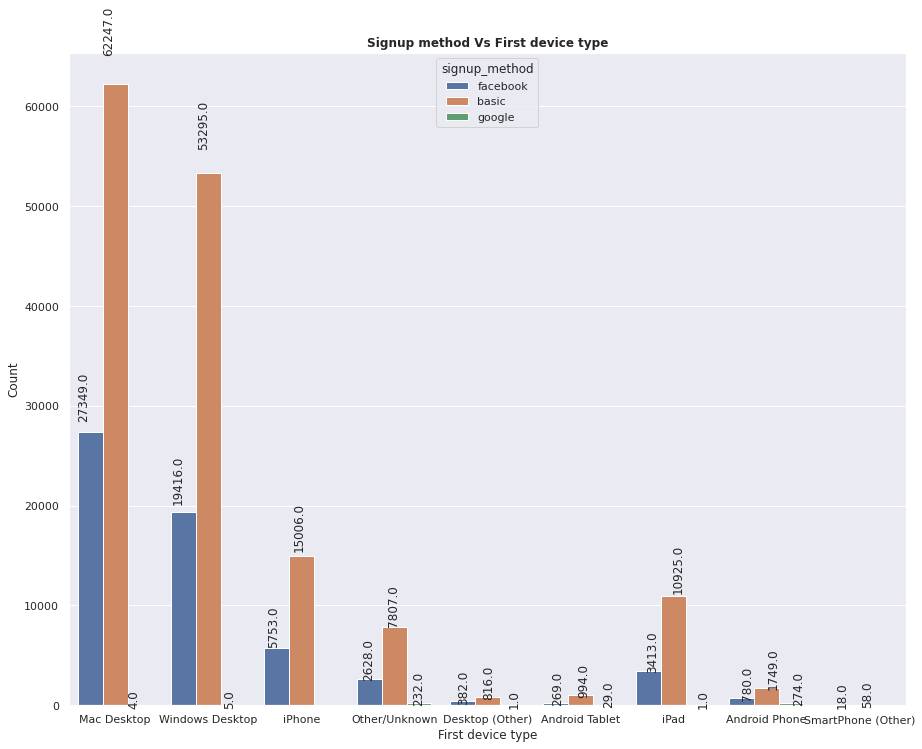

In [ ]:
#Bar plot that shows the distribution of users w.r.t signup method and first device type:

plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
ax_genf = sns.countplot(hue="signup_method", x="first_device_type",data=train_set)
for p in ax_genf.patches:
    ax_genf.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Signup method Vs First device type",fontweight='bold')
plt.xlabel('First device type')
plt.ylabel('Count')
plt.show()

**Observations :**

* Irrespective of the device type used, majority of users used **'basic'** as their signup method.

* The distribution of users under each device type follows same pattern. Hence the features signup method and affiliate channel in combination might not be that helpful. 

####**SIGNUP METHOD - SIGNUP FLOW - COUNTRY DESTINATION :**

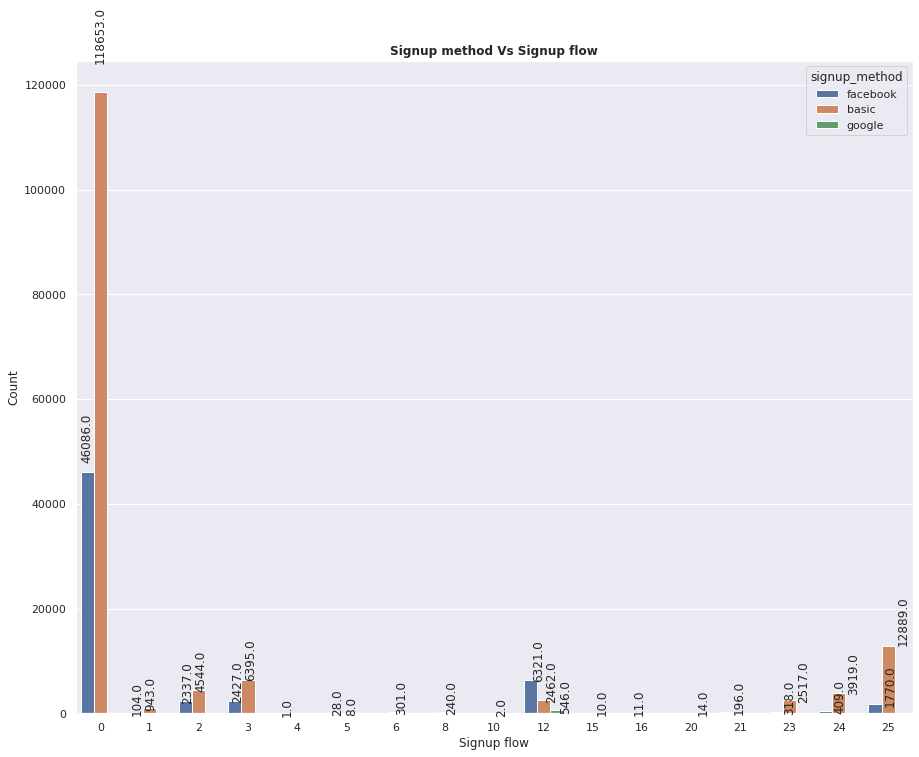

In [ ]:
#Bar plot that shows the distribution of users w.r.t signup method and signup flow:

plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
ax_genf = sns.countplot(hue="signup_method", x="signup_flow",data=train_set)
for p in ax_genf.patches:
    ax_genf.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Signup method Vs Signup flow",fontweight='bold')
plt.xlabel('Signup flow')
plt.ylabel('Count')
plt.show()

**Observations :**

* Unlike in the case of the 'signup flow' as '12', where most users used ' Facebook' as the 'signup method' and, in all the other cases, 'Basic' is the most used means for signup.
* Hence, features 'signup flow' and 'signup method' are related. The combination of both can be helpful.

####**FIRST BROWSER - SIGNUP METHOD - COUNTRY DESTINATION :**

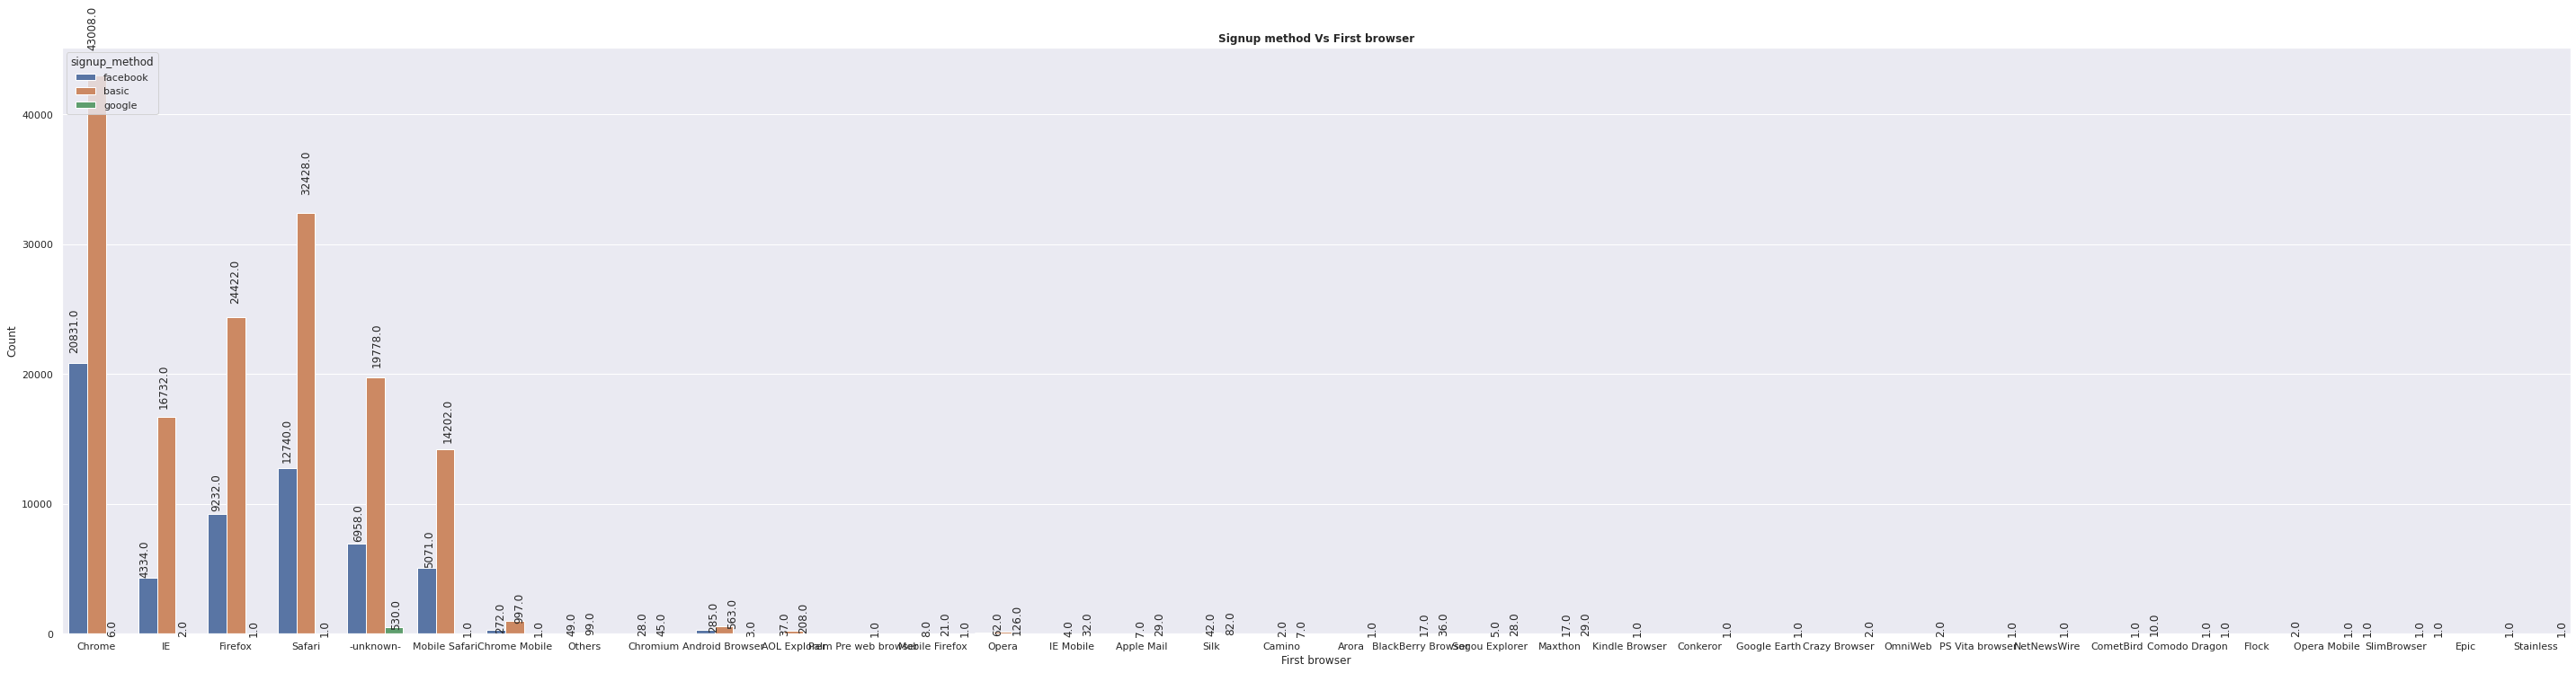

In [ ]:
#Bar plot that shows the distribution of users w.r.t signup method and first browser:

plt.figure(figsize=(50,12))
sns.set(style="darkgrid")
ax_genf = sns.countplot(hue="signup_method", x="first_browser",data=train_set)
for p in ax_genf.patches:
    ax_genf.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Signup method Vs First browser",fontweight='bold')
plt.xlabel('First browser')
plt.ylabel('Count')
plt.show()

**Observations :**

* Irrespective of the first browser used, majority of users used **'basic'** as their signup method.

* The distribution of users under each first browser type follows same pattern. Hence the features first browser type and affiliate channel in combination might not be that helpful. 

####**FIRST BROWSER - SIGNUP FLOW - COUNTRY DESTINATION :**

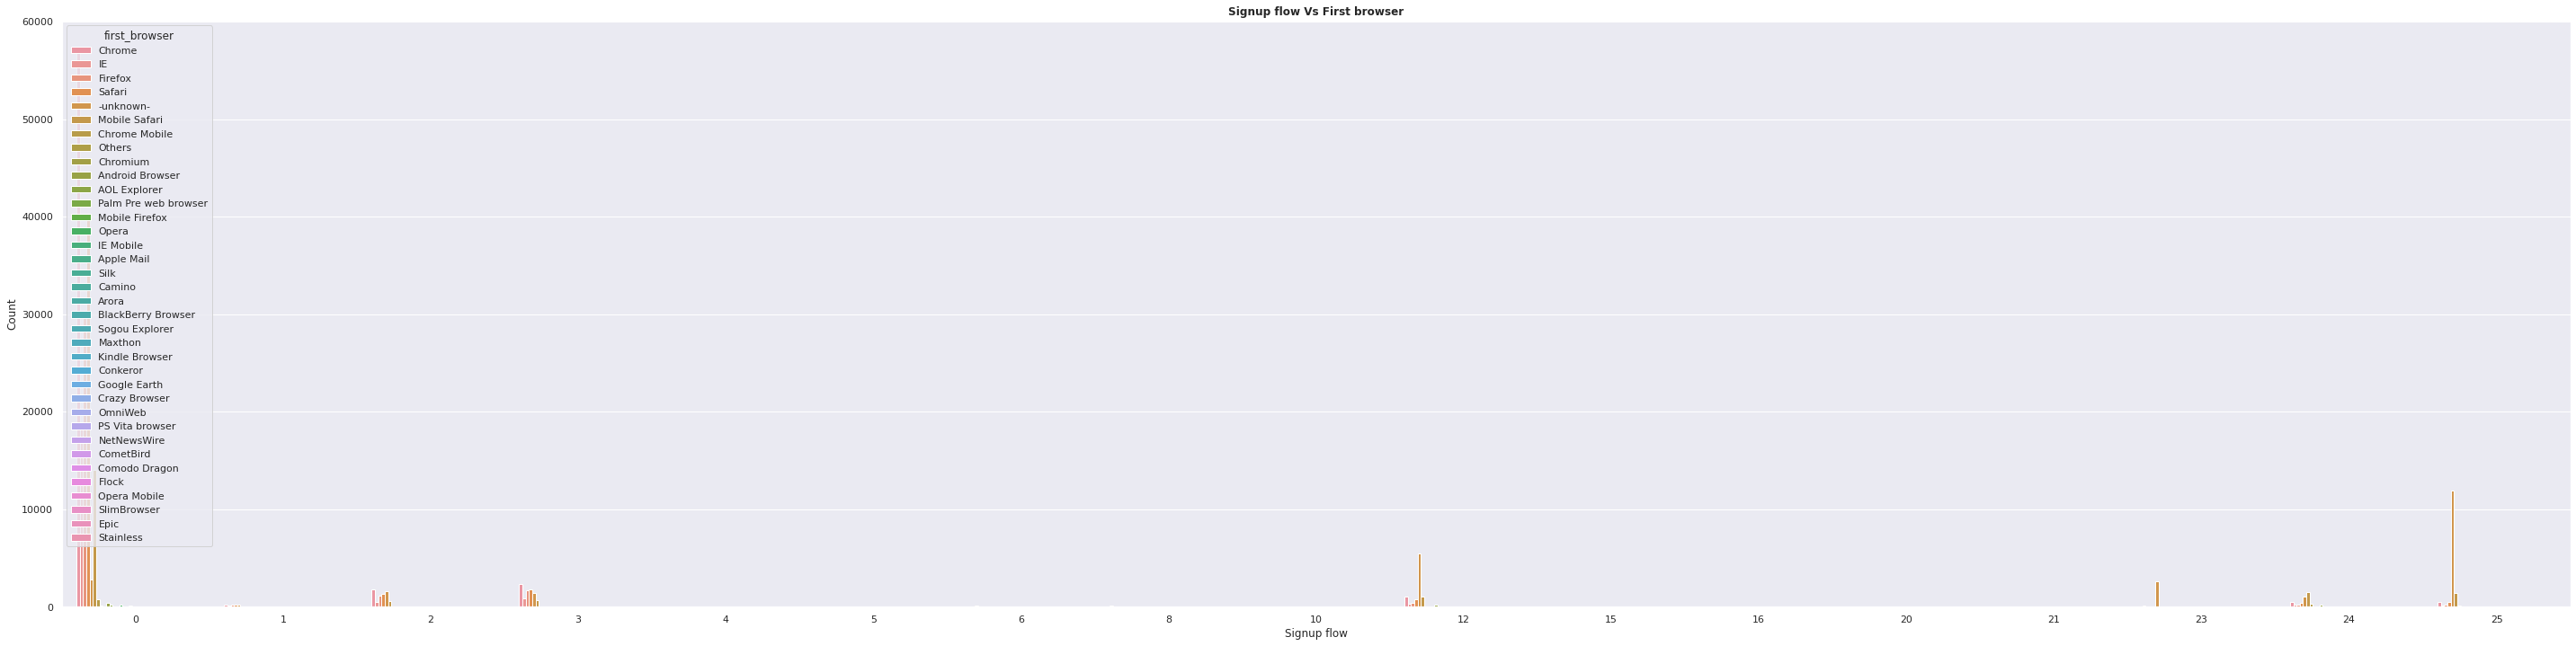

In [ ]:
#Bar plot that shows the distribution of users w.r.t signup flow and first browser:

plt.figure(figsize=(50,12))
sns.set(style="darkgrid")
ax_genf = sns.countplot(x="signup_flow", hue="first_browser",data=train_set)
plt.title("Signup flow Vs First browser",fontweight='bold')
plt.xlabel('Signup flow')
plt.ylabel('Count')
plt.show()

**Observations :**

* In case of signup flow categories - **'12','23','25'**, **'Unknown'** first browser has been used by users.

* Users who used signup flow **'24'**, mostly used **'Mobile safari'** as first browser.

* Hence, we observe that the features 'signup flow' and 'first browser' are related to each other and a combination of both is useful.

####**SIGNUP METHOD - AFFILIATE CHANNEL - COUNTRY DESTINATION**

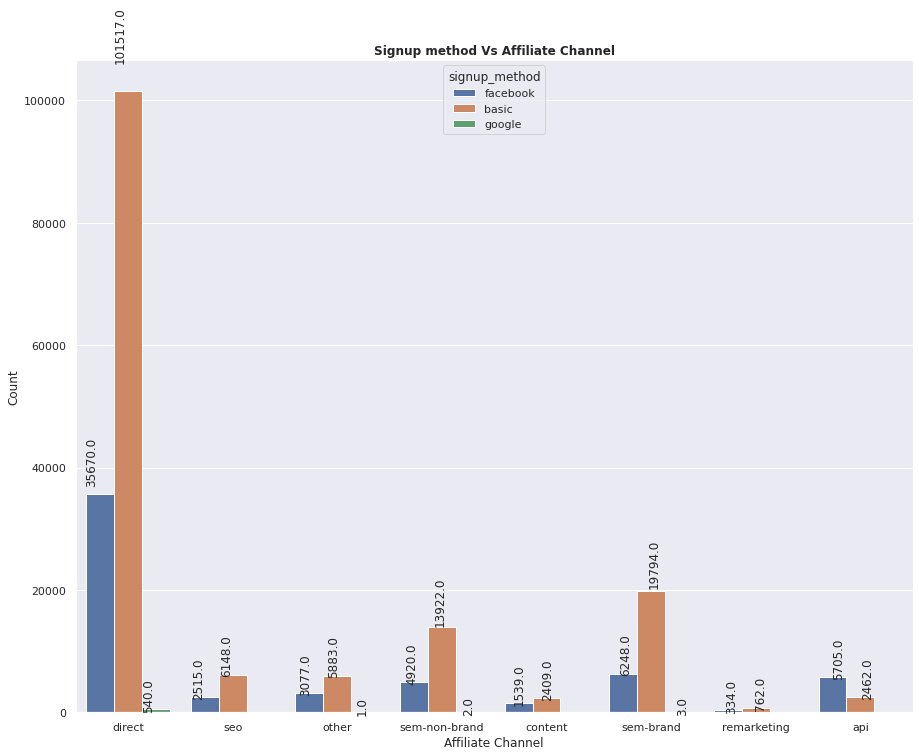

In [ ]:
#Bar plot that shows the distribution of users w.r.t signup method and affiliate channel:

plt.figure(figsize=(15,12))
sns.set(style="darkgrid")
ax_genf = sns.countplot(hue="signup_method", x="affiliate_channel",data=train_set)
for p in ax_genf.patches:
    ax_genf.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Signup method Vs Affiliate Channel",fontweight='bold')
plt.xlabel('Affiliate Channel')
plt.ylabel('Count')
plt.show()

**Observations :**
* This plot shows the distribution of users w.r.t signup method and affiliate channel. 
* Most users with 'Facebook' as their signup method followed the 'API' affiliate channel. 
* In all the other affiliate channels, 'basic' is the most used signup method.
* There are no users with google as signup_method and  'SEO' or 'API' or 'remarketing' or 'content' affiliate channels.

In [ ]:
#Calculating the cross table for 'country_destination' and 'affiliate_channel & signup_method':
cross_sm_ac = pd.crosstab(train_set.country_destination,[train_set.affiliate_channel,train_set.signup_method]).apply(lambda r: r/r.sum(), axis=1)

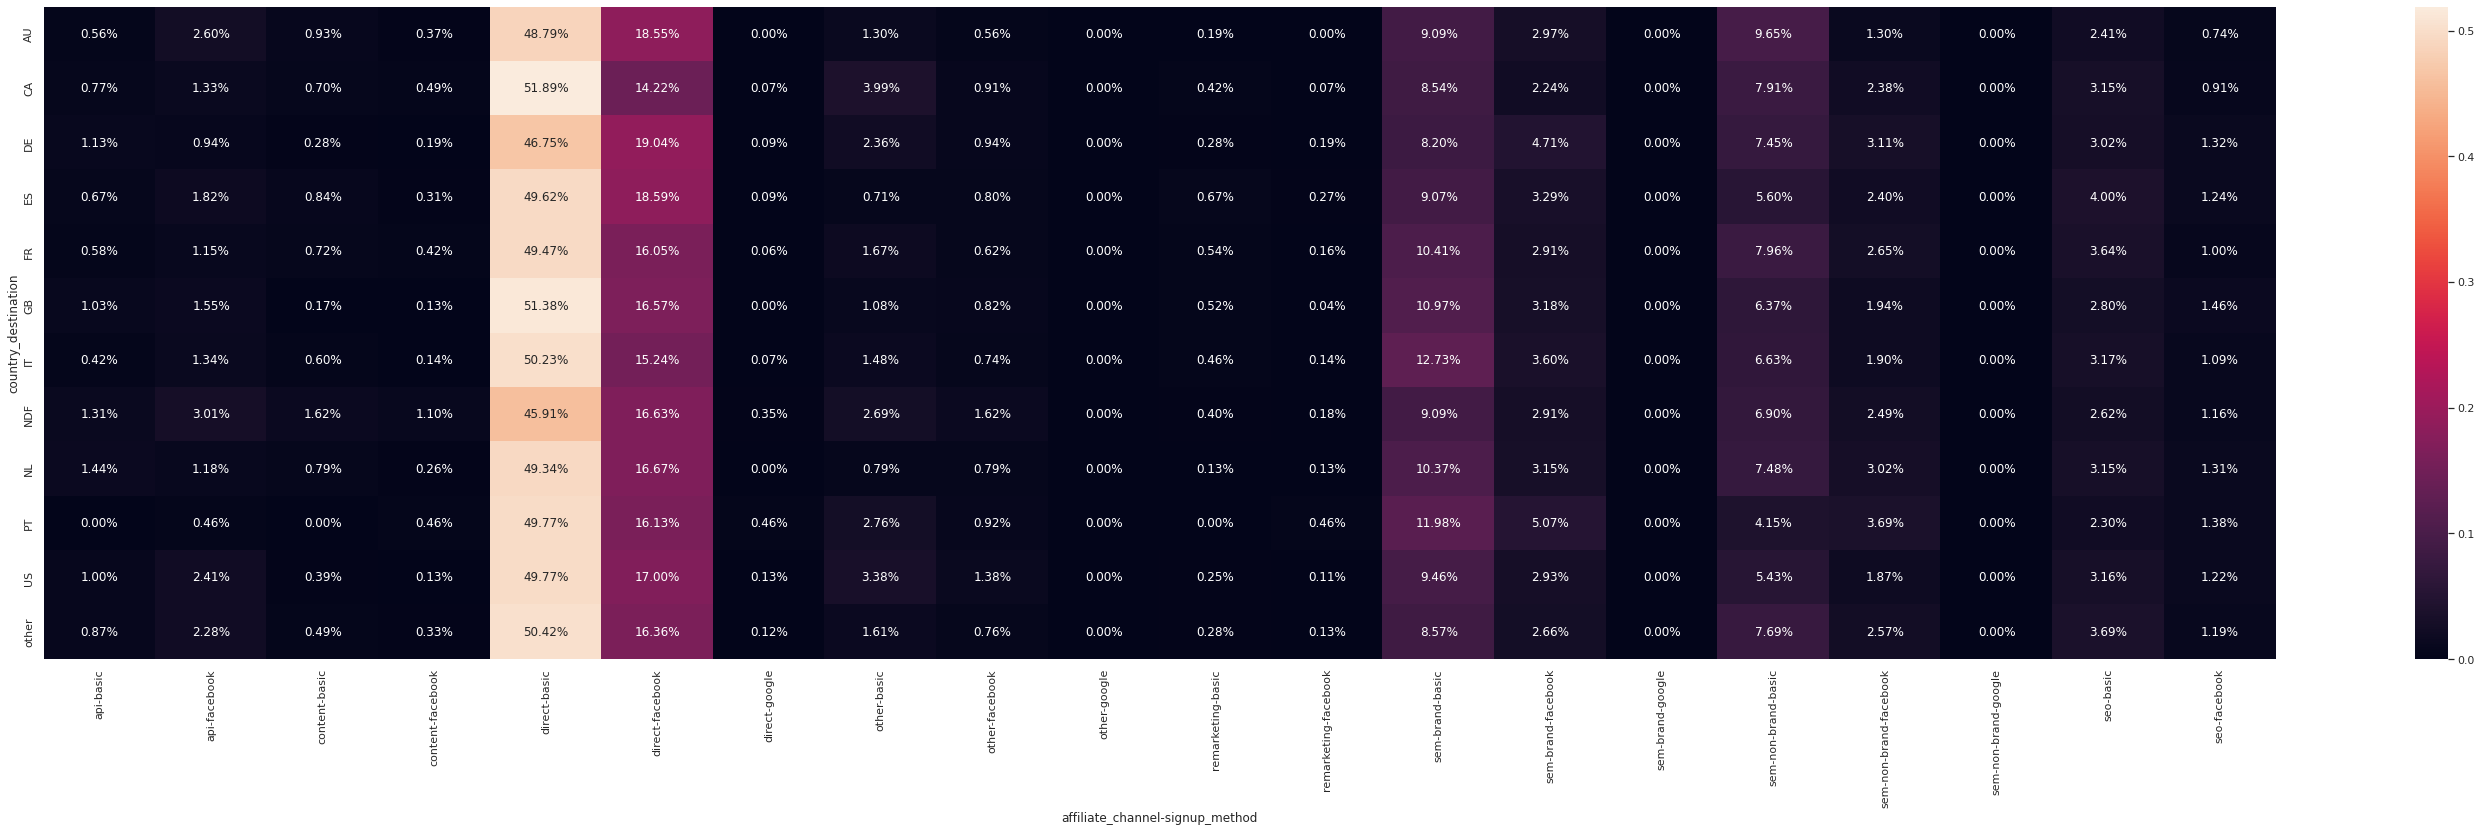

In [ ]:
#Plotting the Heatmap for above cross table:
#Each cell represents the percentage of users who chose a particular country destination followed a particular combination of affiliate channel and signup method.

plt.figure(figsize=(50,12))
sns.heatmap(cross_sm_ac,annot=True,fmt=".2%")
plt.show()

**Observations :**

* From the heatmap plot above, we observe that for every country destination, **nearly 50%** of the users opted combination of **direct as affiliate channel and signup method as basic**. The highest percentage (**of 55.91%**) is recorded by users who chose **'CA'** as their country destination.

* The next popular combinations used by the users is **'direct-facebook'** and **'sem-brand-basic'**

* The proportion of users following various combination of affiliate channel and signup method are differing significantly from one country destination to another. Hence, we can conclude that signup method and affiliate channel are important features.

####**AFFILIATE CHANNEL - AFFILIATE PROVIDER - COUNTRY DESTINATION :**

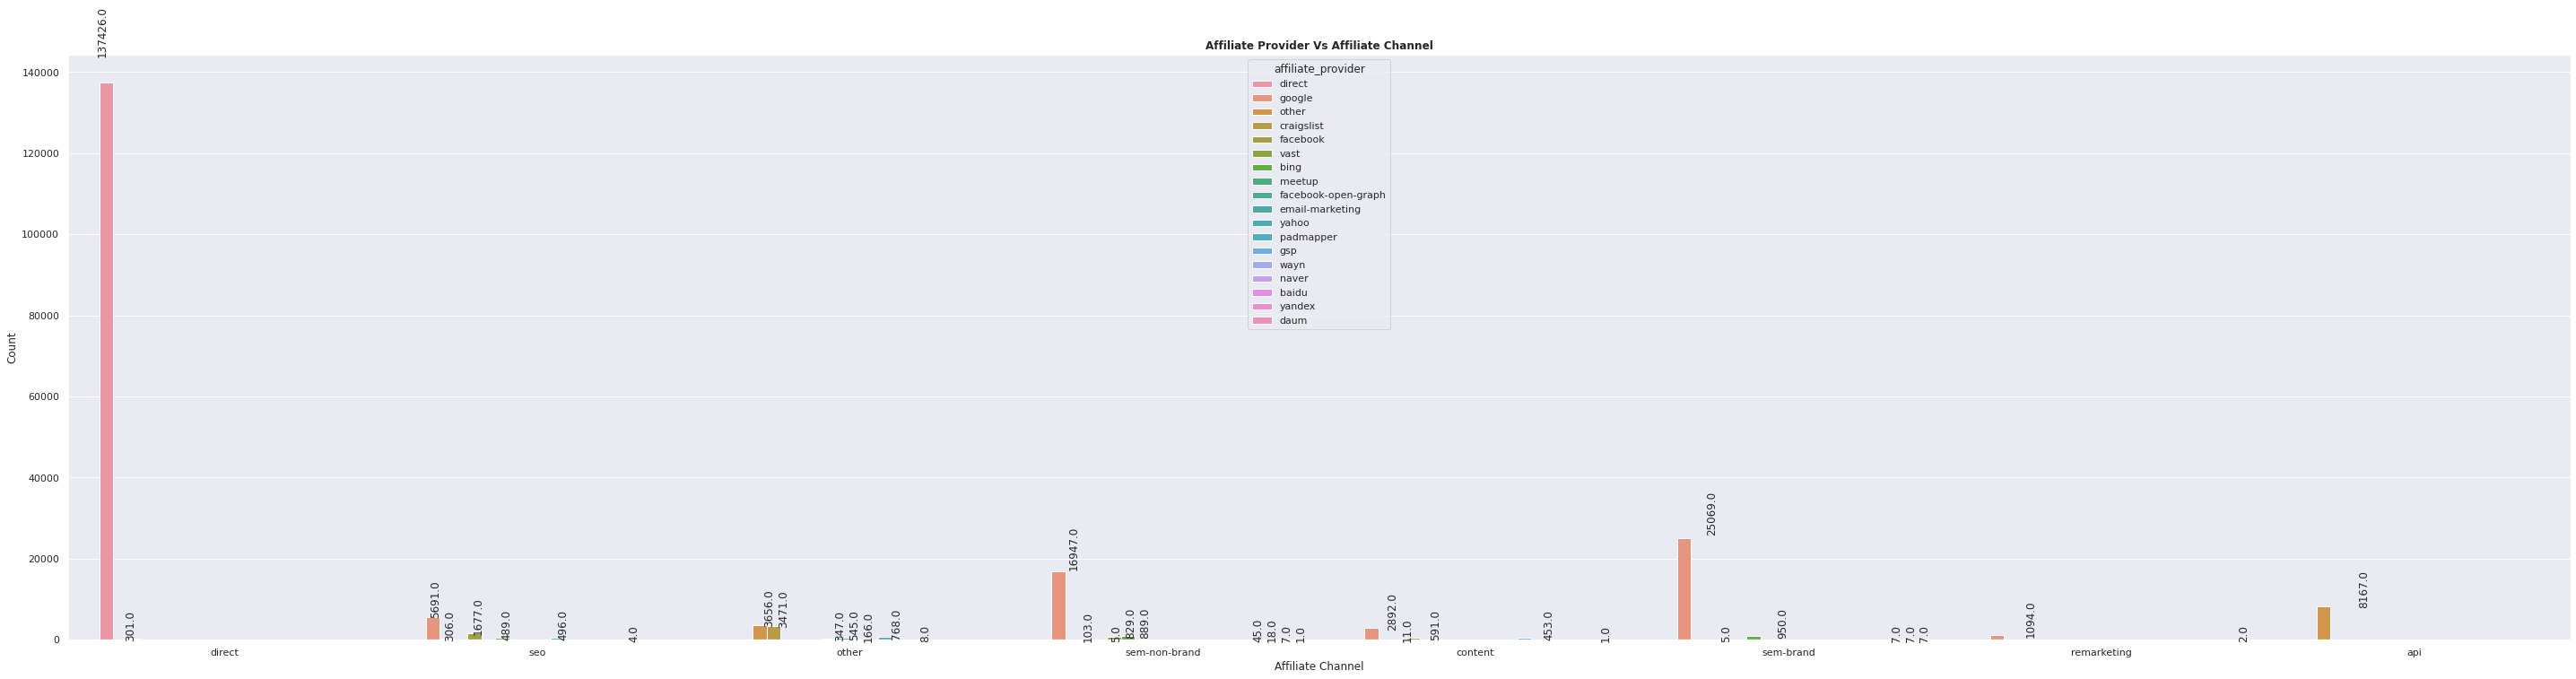

In [ ]:
#Bar plot that shows the distribution of users w.r.t affiliate provider and affiliate channel:

plt.figure(figsize=(50,12))
sns.set(style="darkgrid")
ax_genf = sns.countplot(hue="affiliate_provider", x="affiliate_channel",data=train_set)
for p in ax_genf.patches:
    ax_genf.annotate(str(p.get_height()), (p.get_x()*1.02, p.get_height() * 1.05),rotation = 90)
plt.title("Affiliate Provider Vs Affiliate Channel",fontweight='bold')
plt.xlabel('Affiliate Channel')
plt.ylabel('Count')
plt.show()

**Observations :**

* In case of **'direct'** as affiliate channel, the affiliate provider is **'direct'** itself.

* For affiliate channels like **'sem-non-brand', 'sem-brand', 'seo', 'remarketing' and 'content'**, **'Google'** is the popular affiliate provider.

* For **'api'** as affiliate channel, **'facebook-open-graph'** is the popular affiliate provider.

* Hence, we can observe that the features affiliate channel and affiliate provider are related and the combination of both can be helpful.

###**LOADING THE TRAIN DATASET AFTER CHANGES INTO A CSV:**

In [ ]:
train_set.to_csv(r'/content/drive/MyDrive/DataSets/train_set_cleaned.csv', index = False)